<a class="anchor" id="0"></a>
# **AISC2007 - Deep Learning - Group Assignment 2 - Group E**

<!DOCTYPE html>
<html>
<head>
  <title align='center'>Group E MECE Table</title>
   <style>
    /* CSS rule for center-aligning the title */
    title {
      text-align: center;
    }
    /* CSS rules for the table styling */
    table {
      border-collapse: collapse;
      width: 100%;
    }
    th, td {
      text-align: left;
      padding: 8px;
      border-bottom: 2px solid #000;
      border-right: 2px solid #000;
    }
    th {
      background-color: #f2f2f2;
      border-right: 2px solid #000;
    }
    td:last-child, th:last-child {
      border-right: none;
    }
  </style>
</head>
<body>
  <table>
    <tr>
      <th>S.NO</th>
      <th>Name</th>
      <th>Tasks</th>
      <th>Descriptions</th>
    </tr>
    <tr>
      <td>1 </td>
      <td>Harsha</td>
      <td>Feature Engineering</td>
      <td>Analyzed the given data, got to know there are no outliers and perfromed the undersampling the for Machine Learning model(Random Forest)</td>
    </tr>
    <tr>
      <td>2 </td>
      <td>Amber</td>
      <td>Model Interpretability - ML model</td>
      <td>Calculated confusion matrix and harmonic mean for Random forestAnd check overall interpretability</td>
    </tr>
    <tr>
      <td>3 </td>
      <td>Kumar Dahal</td>
      <td>Model Interpretability - DNN</td>
      <td>Calculated confusion matrix and harmonic mean for DNN and plotted the difference of 2 harmonic mean in graph</td>
    </tr>
     <tr>
      <td>4 </td>
      <td>Abhishek Singh</td>
      <td>Feature Importance</td>
      <td>Perfromed the featrure importance on the undersampled data and find out the signoficant features. Performed the modelling on the newly obtained columns and checked the accuracy.</td>
    </tr>
    <tr>
      <td>5 </td>
      <td>Gowtham</td>
      <td>Data Analysis</td>
      <td>Performed in-depth data review to summarize each variable's statistics, created a heatmap for variable correlations, detected outliers for further examination, and analyzed variable pairs to discover fundamental patterns in the data.</td>
    </tr>
    <tr>
      <td>6 </td>
      <td>Srinivasateja</td>
      <td>Data Preprocessing</td>
      <td>Performed the scaling of the data and worked on oversampling of data as there is no uniformity in distribution of data. This data is used as input to the Neural Netowrk.</td>
    </tr>
    <tr>
      <td>7 </td>
      <td>Snehalatha</td>
      <td>Data Visualizations</td>
      <td>Developed a data profiling function to provide statistical summaries of the dataframe, constructed a nullity heatmap for assessing data integrity, conducted univariate analysis, and visualized a network graph to interpret the IP address structure and network connections.</td>
    </tr>
    <tr>
      <td>8 </td>
      <td>Jai Doshi</td>
      <td>Model Building using Random Forest and Tuning</td>
      <td>Performed the modelling of Machine Learning model using various parameters in Random forest model and checked the accuracy. Later applied the GridSearchCV on the under sampled data and checked the metrics. </td>
    </tr>
    <tr>
      <td>9 </td>
      <td>Girish Sai Thiruvidhula</td>
      <td>Model Building - Neural Networks and Tuning</td>
      <td>Performed various ANN model with regularization techniques and treid to reduce overfitting. Leraned why some regualrization techiques work only till some extent in handling overfitting like early stopping. L1 and L2 regualrization technique to enhance the model performance.</td>
    </tr>
  </table>
</body>
</html>


In [1]:
# Importing the required modules
import pandas as pd
import missingno as msno
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [2]:
# Loading the data into the dataframe
df = pd.read_csv('NetworkIntrusionDetection.csv')
df.head()

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,229.58333,1359,745,786,22,6.929338,14,14,6,63760,39032,1593951420997637,159395141801898,14579.327000,malicious,2.978657
1,235.00000,0,23,786,2250,3.969002,5,3,6,4837,51307,1593951421585135,1593951421116074,91.287040,malicious,0.469061
2,0.00000,56,56,786,0,1.020244,1,1,1,14618,0,1593951418925389,1593951418925299,114.267365,malicious,0.000090
3,3751.25000,797,22810,786,9200,1.634312,8,6,6,786,41986,1593952043780839,1593952013769036,38581.203000,benign,30.011803
4,64.00000,0,47,786,22222,4.155132,4,3,6,56971,198,1593951423645511,1593951423516886,195.291210,malicious,0.128625


## **Data Points Information**
The data contains network events with various attributes.

- **avg_ipt:** Average inter-packet time.
- **bytes_in:** Number of incoming bytes.
- **bytes_out:** Number of outgoing bytes.
- **dest_ip:** Destination IP address (encoded).
- **dest_port:** Destination port number.
- **entropy:** Entropy measurement (possibly of the traffic).
- **num_pkts_out:** Number of outgoing packets.
- **num_pkts_in:** Number of incoming packets.
- **proto:** Network protocol used.
- **src_ip:** Source IP address (encoded).
- **src_port:** Source port number.
- **time_end:** End time of the event.
- **time_start:** Start time of the event.
- **total_entropy:** Total entropy.
- **label:** Classification of the event (e.g., malicious, benign).
- **duration:** Duration of the event.


In [3]:
# Checking the size of the dataset
df.shape

(1965386, 16)

In [5]:
def get_data_profile(df):
    dp= []
    cols = df.columns
    for x in cols:
        dtype = df[x].dtypes
        nunique = df[x].nunique()
        null = df[x].isnull().sum()
        duplicates = df[x].duplicated().sum()
        dp.append([x,dtype,nunique,null,duplicates])
    data_profile = pd.DataFrame(dp)
    data_profile.columns = ['column','dtype','nunique','null','duplicates']
    return data_profile

* Provides Statistical Summary of the Data

In [6]:
get_data_profile(df)

,column,dtype,nunique,null,duplicates
0,avg_ipt,float64,38009,0,1927377
1,bytes_in,int64,15083,0,1950303
2,bytes_out,int64,31477,0,1933909
3,dest_ip,int64,319,0,1965067
4,dest_port,int64,20409,0,1944977
5,entropy,float64,993822,0,971564
6,num_pkts_out,int64,256,0,1965130
7,num_pkts_in,int64,256,0,1965130
8,proto,int64,6,0,1965380
9,src_ip,int64,802,0,1964584


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
avg_ipt,1965386.0,1.537916e+06,4.435281e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.294967e+09
bytes_in,1965386.0,6.646870e+02,2.947078e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.549800e+04
bytes_out,1965386.0,4.589470e+03,6.382576e+03,0.000000e+00,0.000000e+00,1.004000e+03,8.688000e+03,6.553400e+04
dest_ip,1965386.0,1.619014e+03,9.038564e+03,4.000000e+00,7.860000e+02,7.860000e+02,7.860000e+02,3.965070e+05
dest_port,1965386.0,1.894348e+04,1.973066e+04,0.000000e+00,9.200000e+03,9.200000e+03,5.073400e+04,6.553400e+04
entropy,1965386.0,2.792449e+00,2.191571e+00,0.000000e+00,1.020244e+00,2.513993e+00,4.611140e+00,1.351081e+02
num_pkts_out,1965386.0,5.284574e+00,1.152795e+01,0.000000e+00,1.000000e+00,3.000000e+00,7.000000e+00,2.550000e+02
num_pkts_in,1965386.0,2.072409e+00,8.505669e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.550000e+02
proto,1965386.0,6.608359e+00,2.694902e+00,1.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.800000e+01
src_ip,1965386.0,8.551891e+03,2.944796e+04,3.000000e+00,7.860000e+02,7.860000e+02,7.860000e+02,3.976510e+05


In [8]:
df.describe(include='object')

,label
count,1965386
unique,3
top,benign
freq,1574580


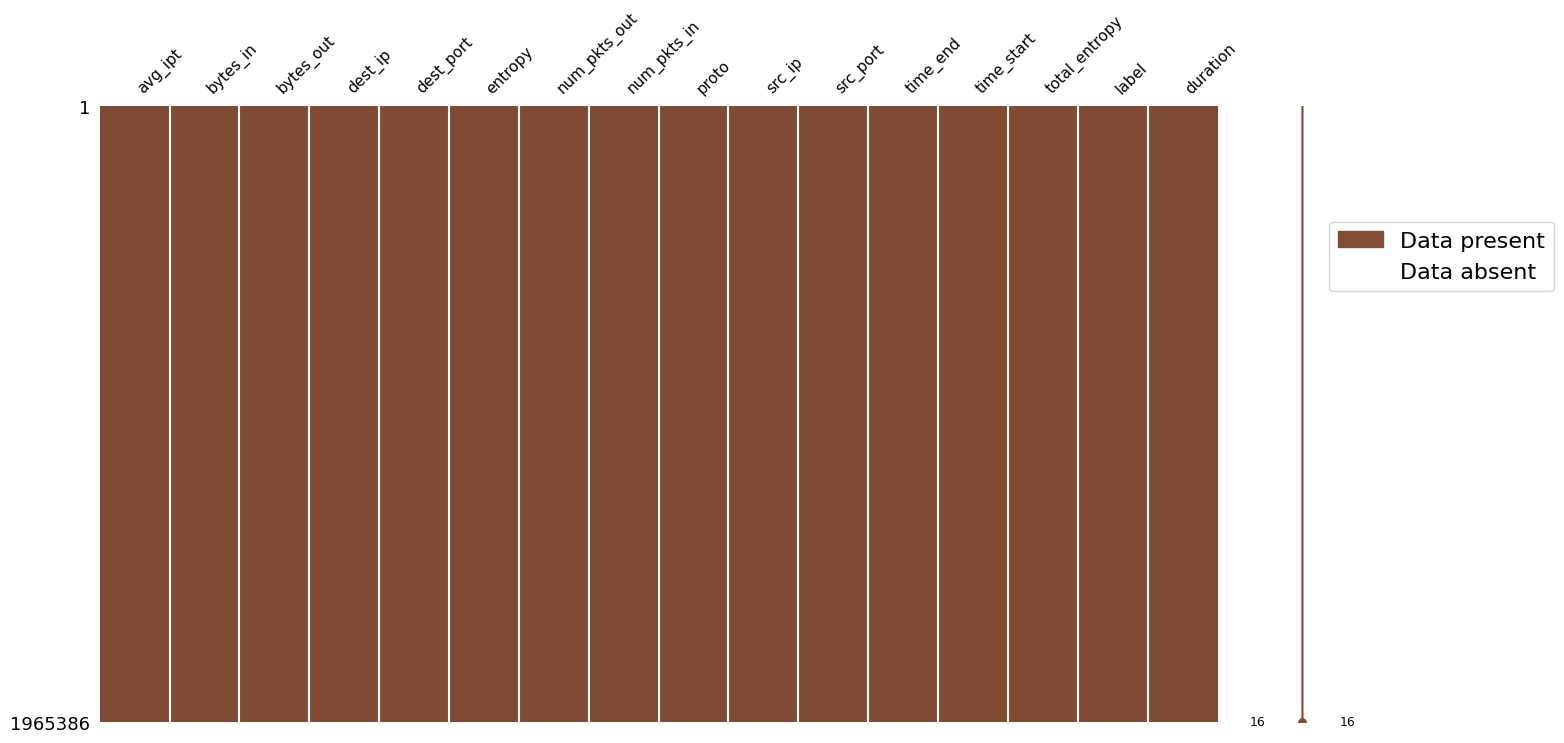

In [9]:
#Checking the missing values

msno.matrix(df, sparkline=True, figsize=(16,8), fontsize=11, color=(0.5, 0.3, 0.2))
Bp = mpatches.Patch(color='#7F4C34',label='Data present')
Wp= mpatches.Patch(color='white', label='Data absent')

plt.legend(loc=[1.1,0.7], handles=[Bp, Wp], fontsize=16)
plt.show()

* The above nullify heatmap has a uniform brown colour across all the features, and it indicates the complete dataset, and we can skip the handling missing values step.

In [10]:
# Checking for duplicates across all columns
duplicates = df.duplicated()

# Counting the number of duplicates
number_of_duplicates = duplicates.sum()

# displaying the actual duplicated rows
duplicate_rows = df[df.duplicated(keep=False)]

duplicate_rows

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
474,0.0,0,0,786,53230,0.0,3,0,6,786,9200,1593919982233924,1593919982233924,0.0,benign,0.0
1072,0.0,0,0,786,53242,0.0,1,0,6,786,9200,159391997661685,159391997661685,0.0,benign,0.0
1254,0.0,0,0,786,53230,0.0,3,0,6,786,9200,1593919982233924,1593919982233924,0.0,benign,0.0
3589,0.0,0,0,786,53242,0.0,1,0,6,786,9200,1593919931995596,1593919931995596,0.0,benign,0.0
4224,0.0,0,0,786,53242,0.0,1,0,6,786,9200,1593919931995596,1593919931995596,0.0,benign,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1940583,0.0,0,0,786,53238,0.0,1,0,6,786,9200,1593919689922261,1593919689922261,0.0,benign,0.0
1941326,0.0,0,0,786,53234,0.0,1,0,6,786,9200,1593919771502271,1593919771502271,0.0,benign,0.0
1941334,0.0,0,0,786,53234,0.0,1,0,6,786,9200,1593919771502271,1593919771502271,0.0,benign,0.0
1943749,0.0,0,0,786,53238,0.0,1,0,6,786,9200,1593922494748392,1593922494748392,0.0,benign,0.0


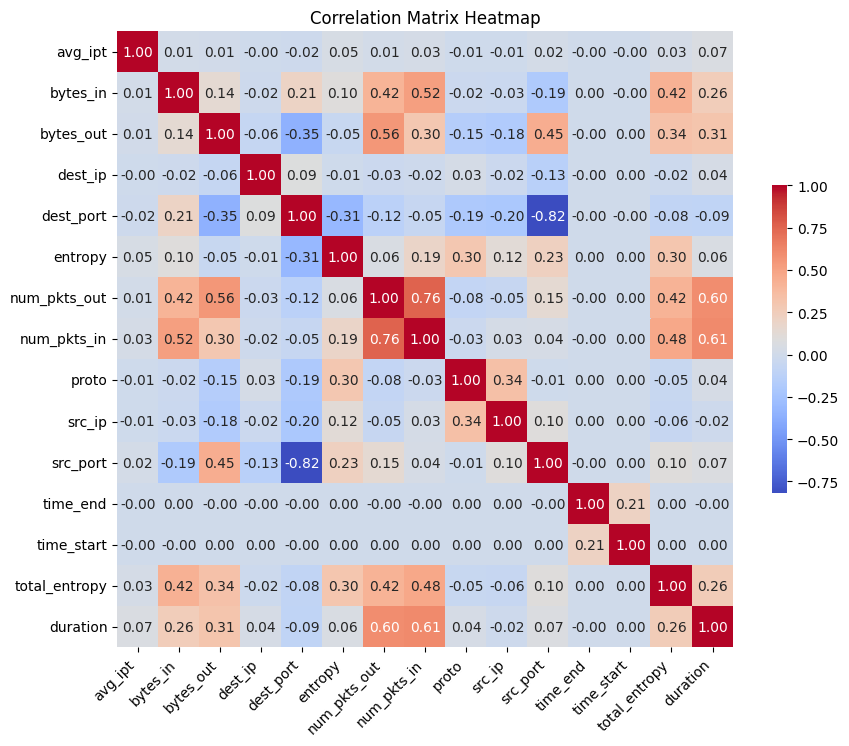

In [11]:
# Calculating the correlation matrix and Creating a heatmap to visualize it
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5})

# Adjust the layout
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

## Observation
* The heatmap shows a direct relationship between num_pkts_out and bytes_out, as well as num_pkts_in and bytes_in, indicating that packet counts are associated with the amount of byte traffic.
* The negative correlation between src_port, src_ip and dest_port, dest_ip could reflect a star-shaped network structure.
* All correlation coefficients are under the predetermined threshold of 0.7, suggesting that multicollinearity is not a concern for this dataset

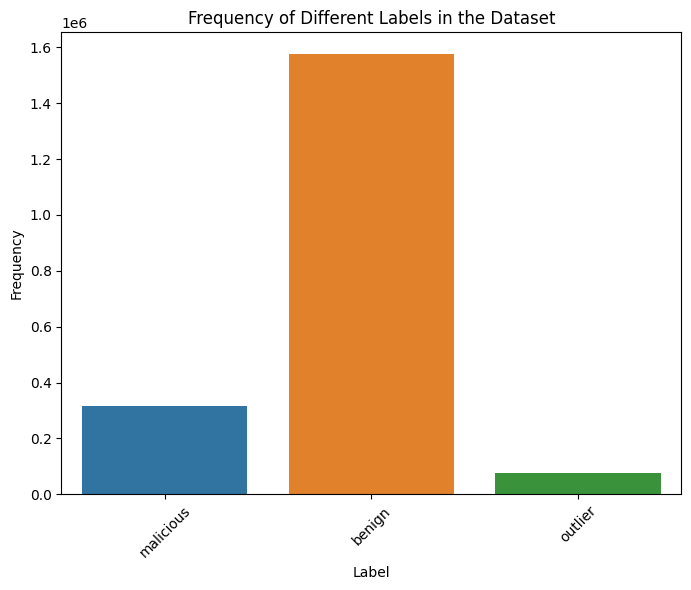

In [12]:
# Plotting a bar chart for the 'label' column to see the frequency of each category

plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Frequency of Different Labels in the Dataset')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [13]:
df['label'].value_counts()

benign       1574580
malicious     315227
outlier        75579
Name: label, dtype: int64

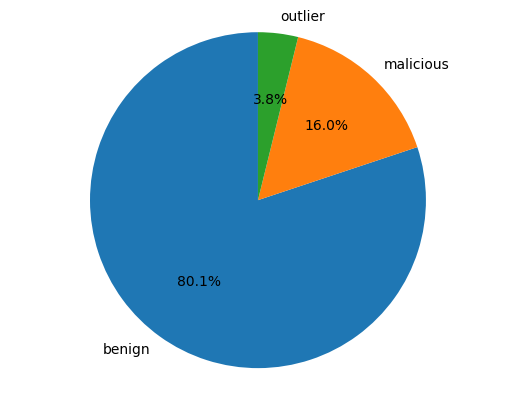

In [14]:
# Pie Chart
label_counts = df['label'].value_counts()
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


* The above graphs indicate the presence of records identified as outliers, which constitute about 3.8% of the dataset. They could be rare or exceptional cases.

* The 'benign' category is the most frequent, with a significantly higher count compared to the 'malicious' and 'outlier' categories. This indicates an imbalance in class distribution.

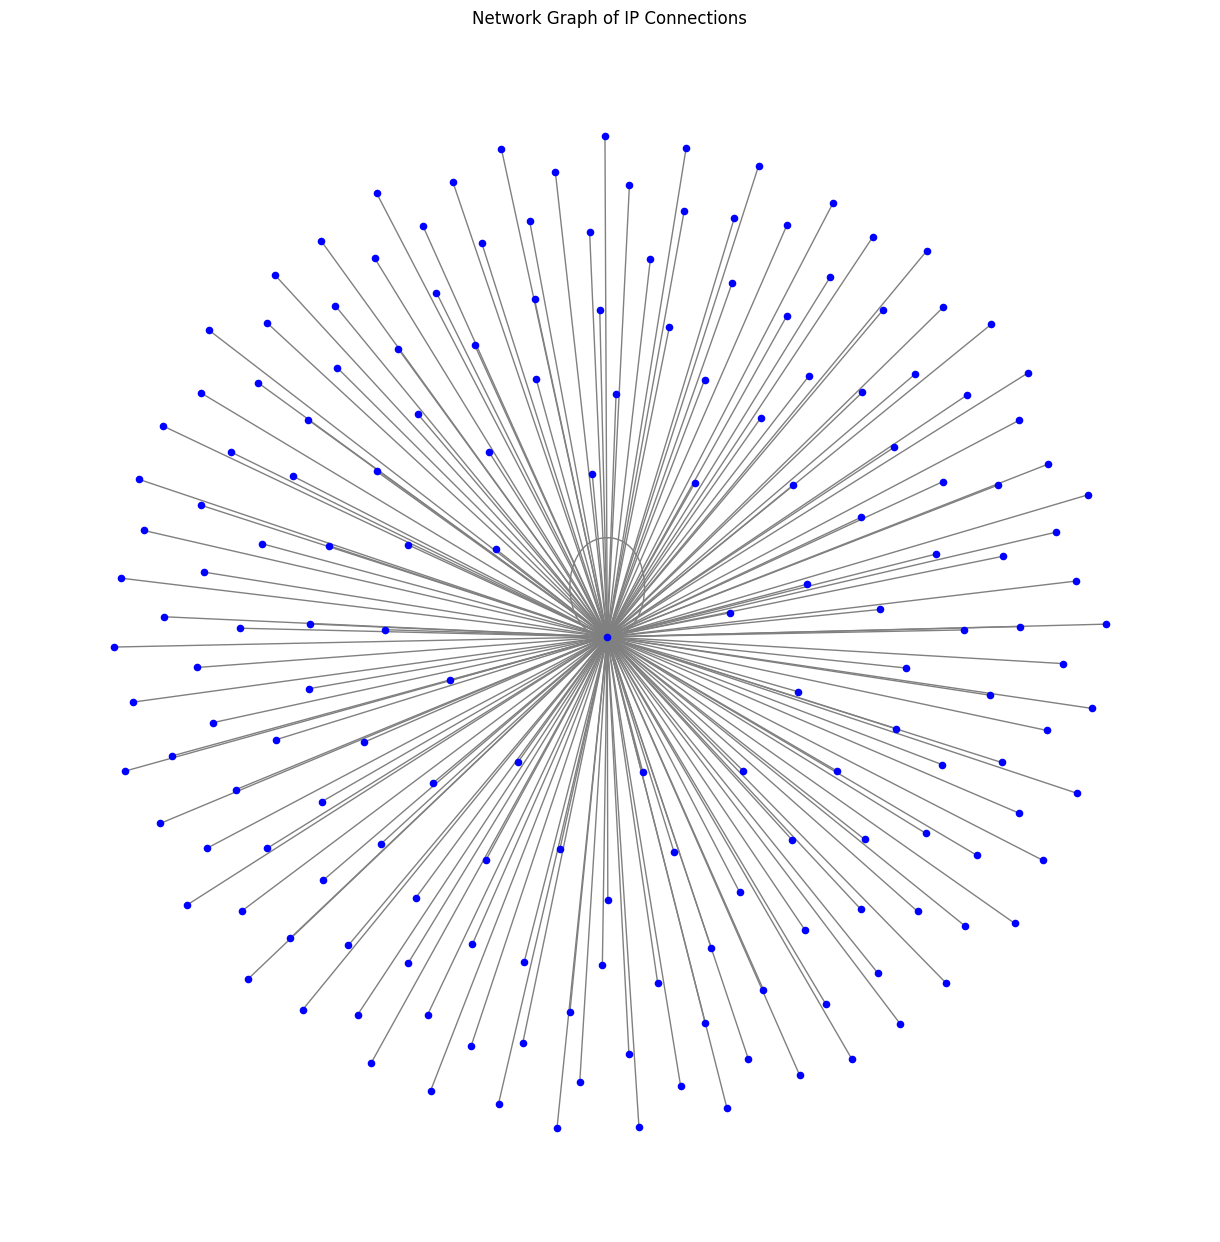

In [15]:
import networkx as nx

subset_data = df.sample(n=10000, random_state=42)

# Creating a graph
G = nx.Graph()

# Adding edges from src_ip to dest_ip
for _, row in subset_data.iterrows():
    G.add_edge(row['src_ip'], row['dest_ip'])

# Plotting the network graph
plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=False, node_size=20, node_color='blue', edge_color='gray')
plt.title('Network Graph of IP Connections')
plt.show()

* From the sample 10000 records we can observe that there is a highly connected node in the center of the graph that represents a significant IP address in the network.
* This could be a server, a router, or a switch that handles a large amount of traffic, acting as a central hub for network communications.
* The graph has a radial structure with most nodes connected directly to the central hub and not to each other. This suggests a star topology, where peripheral nodes communicate primarily through the central node.*

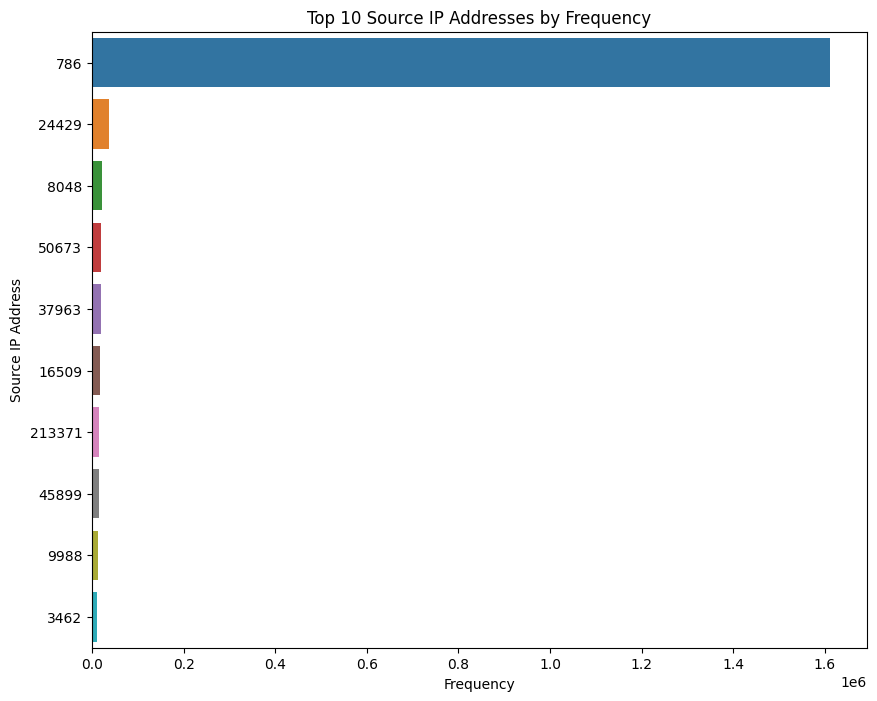

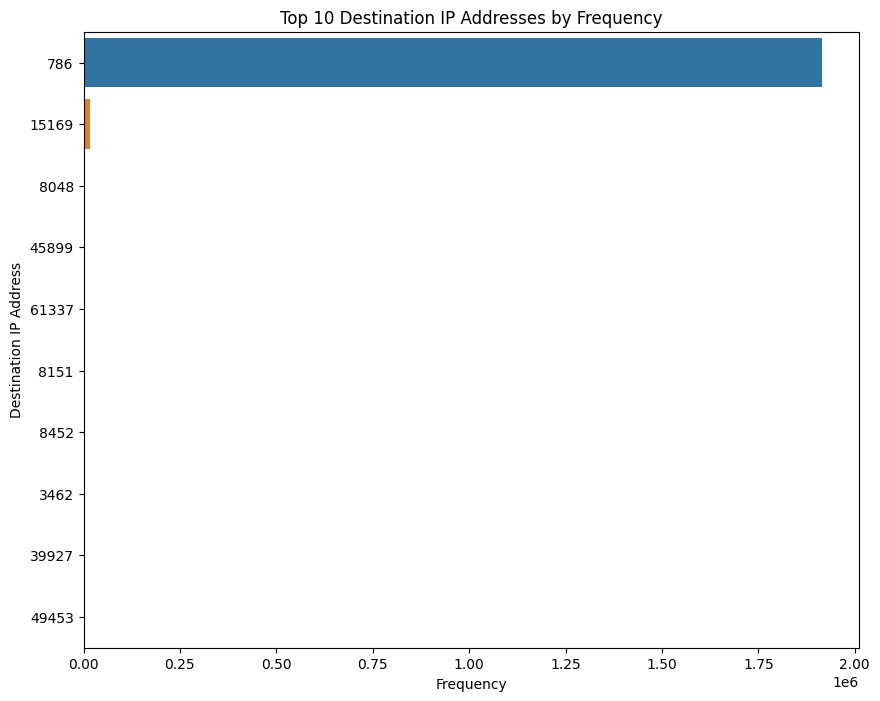

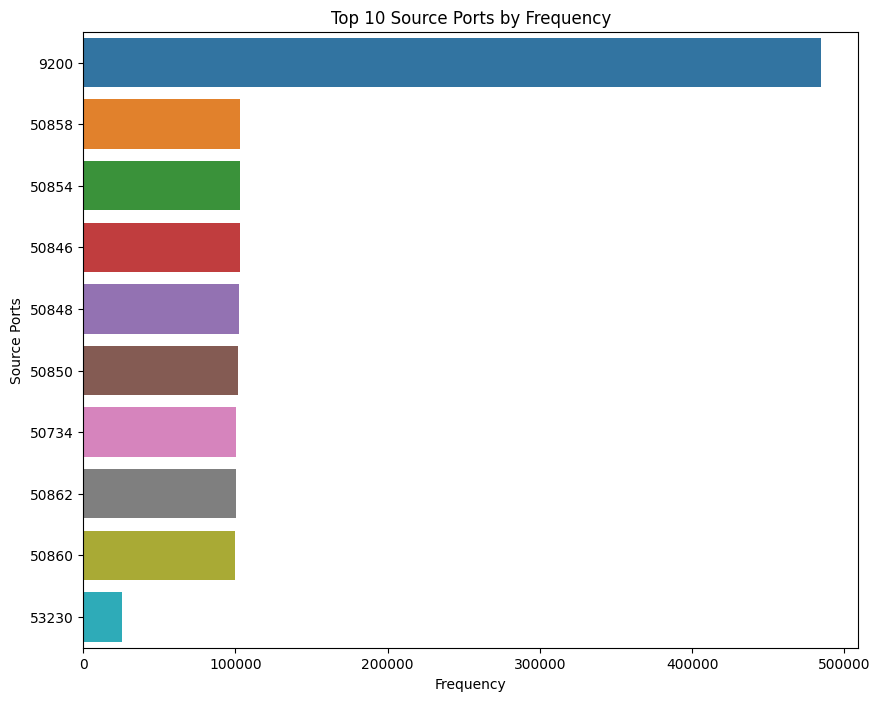

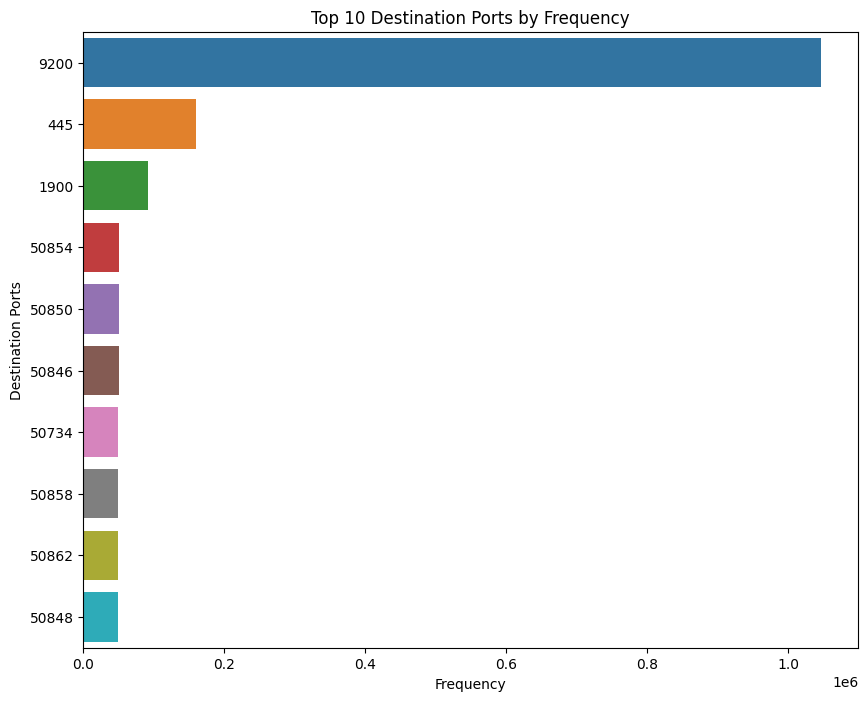

In [16]:
# Plotting the distribution of source IP addresses
plt.figure(figsize=(10, 8))
sns.countplot(y='src_ip', data=df, order = df['src_ip'].value_counts().iloc[:10].index)
plt.title('Top 10 Source IP Addresses by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Source IP Address')
plt.show()

# Plotting the distribution of destination IP addresses
plt.figure(figsize=(10, 8))
sns.countplot(y='dest_ip', data=df, order = df['dest_ip'].value_counts().iloc[:10].index)
plt.title('Top 10 Destination IP Addresses by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Destination IP Address')
plt.show()

# Plotting the distribution of destination IP addresses
plt.figure(figsize=(10, 8))
sns.countplot(y='src_port', data=df, order = df['src_port'].value_counts().iloc[:10].index)
plt.title('Top 10 Source Ports by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Source Ports')
plt.show()

# Plotting the distribution of destination IP addresses
plt.figure(figsize=(10, 8))
sns.countplot(y='dest_port', data=df, order = df['dest_port'].value_counts().iloc[:10].index)
plt.title('Top 10 Destination Ports by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Destination Ports')
plt.show()


* The IP address '786' also appears as the most frequent destination, suggesting it plays a central role in the network traffic both as a source and a destination.
Port '9200' is the most common source port and destination port, reinforcing its role as a key port

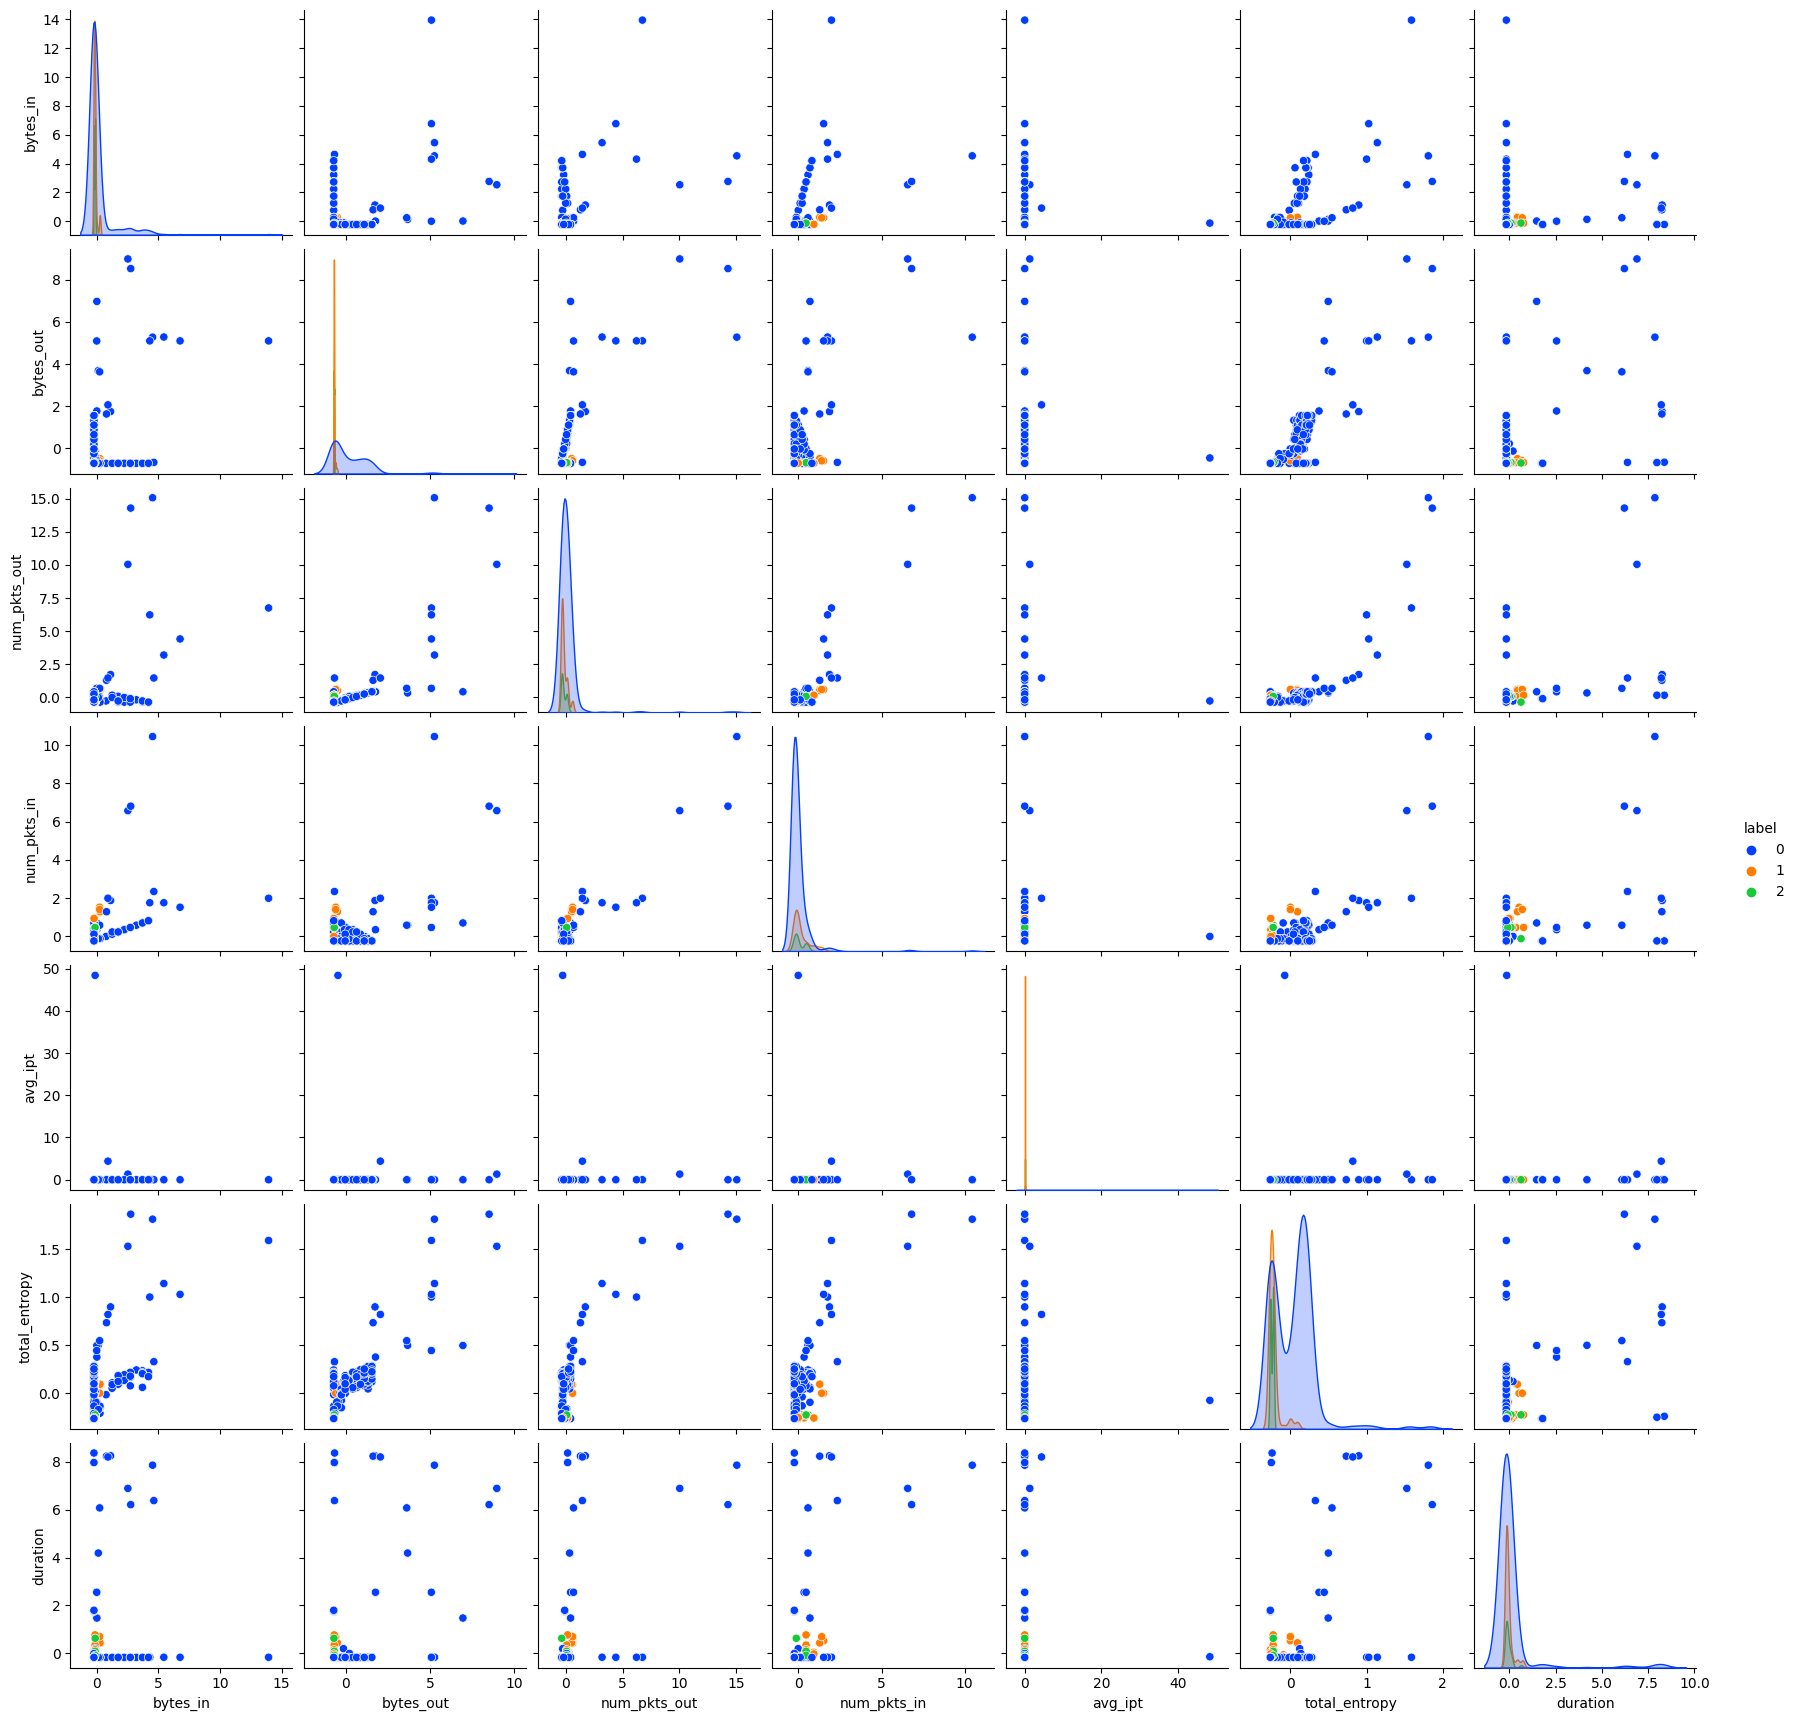

In [50]:
# Selecting a subset of variables to plot
variables_to_plot = ['bytes_in', 'bytes_out', 'num_pkts_out','num_pkts_in', 'avg_ipt', 'total_entropy', 'duration']

sampled_data = df[variables_to_plot].sample(n=500, random_state=42)

# Adding the 'label' column for color coding
sampled_data['label'] = df['label'].sample(n=500, random_state=42)

# Creating the pairplot
sns.pairplot(sampled_data, hue='label', palette='bright')

# Showing the plot
plt.show()

* The distribution of individual features for each label shows that the distributions are skewed and that bimodal distributions are present.

* The presence of outliers in some of the plots suggests that there are extreme values that differ significantly from the rest of the data points.

* There is a variation in the scale of the data across different features, with some features like bytes_in and bytes_out having much larger ranges than others.

* For several pairs of features, such as num_pkts_in and bytes_in, a visible positive correlation indicates that as the number of packets increases, the bytes also tend to increase.

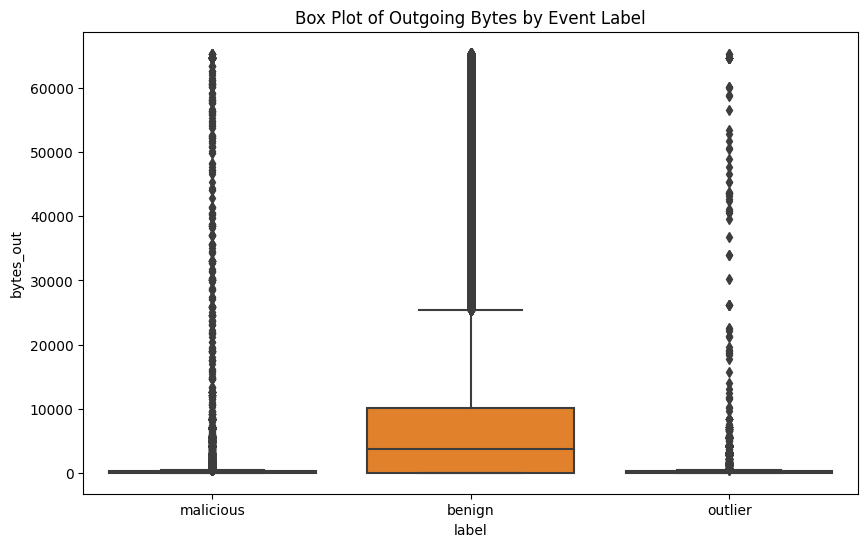

In [25]:
# Box plot for 'bytes_out' segmented by 'label'
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='bytes_out', data=df)
plt.title('Box Plot of Outgoing Bytes by Event Label')
plt.show()


* The benign category has a wide range of values with many outliers, possibly because of high-volume legitimate network activity.
* The 'malicious' category shows a more compressed range.

## **Data Processing**

In [4]:
# Data transformation
# Normalization of numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

print("\nDataFrame after data transformation and feature engineering:")
df.head()


DataFrame after data transformation and feature engineering:


,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,-0.034669,0.235594,-0.602338,-0.092162,-0.958989,1.887637,0.756026,1.402311,-0.225745,1.874769,0.049997,0.333171,-2.963775,-0.001203,1,0.634348
1,-0.034669,-0.225541,-0.715459,-0.092162,-0.846068,0.536854,-0.024686,0.109056,-0.225745,-0.126151,0.655993,0.333171,0.333257,-0.263398,1,-0.046302
2,-0.034675,-0.206539,-0.710289,-0.092162,-0.960104,-0.808646,-0.371668,-0.126082,-2.081100,0.205994,-1.876945,0.333171,0.333257,-0.262982,1,-0.173496
3,-0.034590,0.044896,2.854730,-0.092162,-0.493824,-0.528451,0.235552,0.461762,-0.225745,-0.263716,0.195831,0.333172,0.333258,0.433167,0,7.966253
4,-0.034673,-0.225541,-0.711699,-0.092162,0.166164,0.621784,-0.111431,0.109056,-0.225745,1.644227,-1.867170,0.333171,0.333257,-0.261516,1,-0.138635


In [5]:
# spitting data into dependent and independent variable
X = df.loc[:, df.columns.drop('label')]     # independent variable
y = df['label']  # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

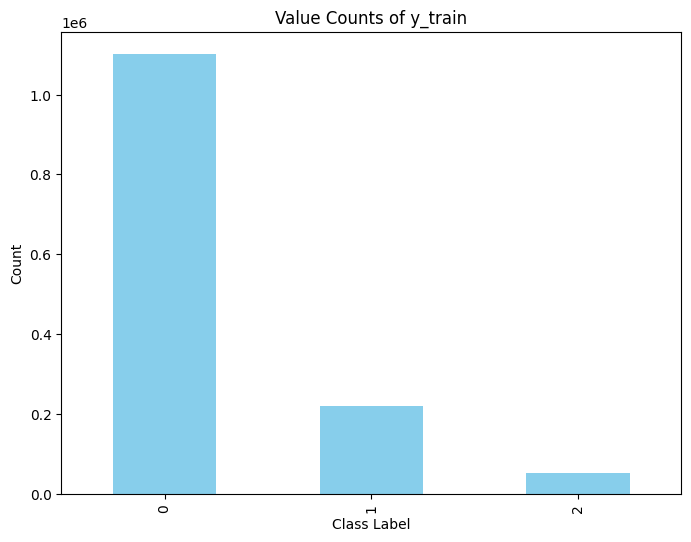

In [31]:
# before sampling
plt.figure(figsize=(8, 6))
y_train.value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Value Counts of y_train')
plt.show()

In [23]:
smote = SMOTE(random_state=42)
X_train_smote , y_train_smote = smote.fit_resample(X_train, y_train)

In [24]:
print(X_train.shape, y_train.shape)
print(X_train_smote.shape , y_train_smote.shape)

(1375770, 15) (1375770,)
(3305709, 15) (3305709,)


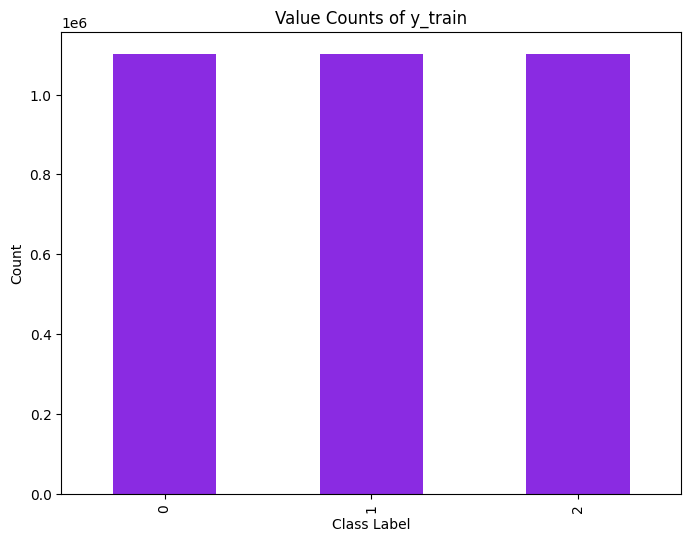

In [25]:
# after sampling
plt.figure(figsize=(8, 6))
y_train_smote.value_counts().sort_index().plot(kind='bar', color='blueviolet')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Value Counts of y_train')
plt.show()

In [6]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [7]:
under_sampler = RandomUnderSampler(random_state=42)
# Apply the under-sampler to the dataset
X_resampled, y_resampled = under_sampler.fit_resample(X_train, y_train)

print("Resampled class distribution:", Counter(y_resampled))

Resampled class distribution: Counter({0: 52981, 1: 52981, 2: 52981})


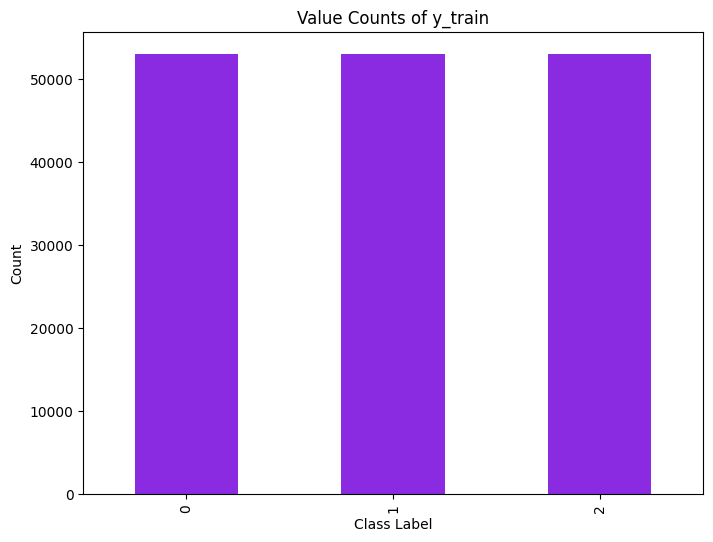

In [8]:
# after sampling
plt.figure(figsize=(8, 6))
y_resampled.value_counts().sort_index().plot(kind='bar', color='blueviolet')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Value Counts of y_train')
plt.show()

## **Model Building - Deep Neural Network**

In [26]:
input_size = X_train_smote.shape[1]
batch_size = 3000

In [27]:
import tensorflow as tf

In [40]:
ann_reg_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_size),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # as we have 3 classes.So, we are using softmax activation
])

# Compile the model with sparse_categorical_crossentropy as we have the output labels are 0,1,2
ann_reg_model.compile(optimizer='adagrad', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ann_reg_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3840      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 3)                 51        
                                                                 
Total params: 47,651
Trainable params: 47,651
Non-traina

In [41]:
# fitting the model
reg_history = ann_reg_model.fit(X_train_smote, y_train_smote, batch_size=batch_size, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1102/1102 [==============================] - 11s 9ms/step - loss: 0.9449 - accuracy: 0.5927 - val_loss: 0.8812 - val_accuracy: 0.8042
Epoch 2/5
1102/1102 [==============================] - 9s 8ms/step - loss: 0.7005 - accuracy: 0.7017 - val_loss: 0.4011 - val_accuracy: 0.8802
Epoch 3/5
1102/1102 [==============================] - 10s 9ms/step - loss: 0.5228 - accuracy: 0.7590 - val_loss: 0.2324 - val_accuracy: 0.9175
Epoch 4/5
1102/1102 [==============================] - 10s 9ms/step - loss: 0.4584 - accuracy: 0.7785 - val_loss: 0.1847 - val_accuracy: 0.9241
Epoch 5/5
1102/1102 [==============================] - 10s 9ms/step - loss: 0.4221 - accuracy: 0.7913 - val_loss: 0.1618 - val_accuracy: 0.9277


In [32]:
def accuracy_loss(history):
  # Accessing the training and validation accuracy values
  train_accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  print("Train Accuracy : ",train_accuracy[-1])
  print("Validation Accuracy : ",val_accuracy[-1])
  print("Train Loss : ",train_loss[-1])
  print("Validation Loss : ",val_loss[-1])
  return train_accuracy,val_accuracy,train_loss,val_loss

In [43]:
train_accuracy,val_accuracy,train_loss,val_loss = accuracy_loss(reg_history)

Train Accuracy :  0.791301965713501
Validation Accuracy :  0.9276546239852905
Train Loss :  0.4221189618110657
Validation Loss :  0.16176608204841614


In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_graphs(train_accuracy,val_accuracy,train_loss,val_loss,epochs=5):
  x = [i for i in range (1, epochs + 1)]

  # Create two subplots side by side
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

  # Plotting the lines on the first subplot
  ax1.plot(x, train_loss, label='train_loss')
  ax1.plot(x, val_loss, label='val_loss')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Loss')
  ax1.set_title('Training and Validation Loss')
  ax1.legend()

  # Plotting the lines on the second subplot
  ax2.plot(x, train_accuracy, label='train_accuracy')
  ax2.plot(x, val_accuracy, label='val_accuracy')
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Accuracy')
  ax2.set_title('Training and Validation Accuracy')
  ax2.legend()

  # Adjust the layout to avoid overlapping titles and labels
  plt.tight_layout()

  # Display the plots
  plt.show()

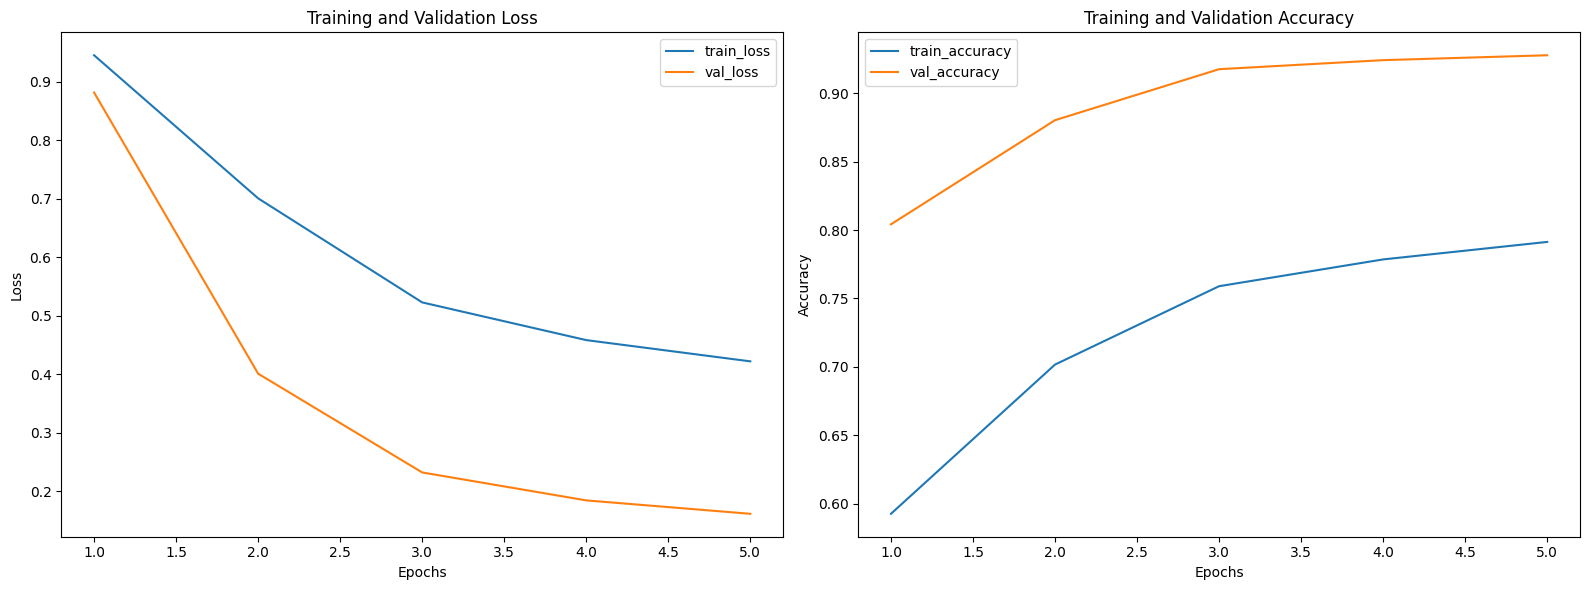

In [45]:
plot_graphs(train_accuracy,val_accuracy,train_loss,val_loss)

In [46]:
ann_adam_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_size),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # as we have 3 classes.So, we are using softmax activation
])

# Compile the model with sparse_categorical_crossentropy as we have the output labels are 0,1,2
ann_adam_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ann_adam_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               3840      
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 3)                 51        
                                                                 
Total params: 47,651
Trainable params: 47,651
Non-trai

In [47]:
# fitting the model
adam_history = ann_adam_model.fit(X_train_smote, y_train_smote, batch_size=batch_size, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1102/1102 [==============================] - 11s 9ms/step - loss: 0.1988 - accuracy: 0.9166 - val_loss: 0.0403 - val_accuracy: 0.9831
Epoch 2/5
1102/1102 [==============================] - 10s 9ms/step - loss: 0.1138 - accuracy: 0.9562 - val_loss: 0.0340 - val_accuracy: 0.9844
Epoch 3/5
1102/1102 [==============================] - 10s 9ms/step - loss: 0.0832 - accuracy: 0.9692 - val_loss: 0.0223 - val_accuracy: 0.9913
Epoch 4/5
1102/1102 [==============================] - 10s 9ms/step - loss: 0.0696 - accuracy: 0.9749 - val_loss: 0.0177 - val_accuracy: 0.9943
Epoch 5/5
1102/1102 [==============================] - 10s 9ms/step - loss: 0.0607 - accuracy: 0.9784 - val_loss: 0.0208 - val_accuracy: 0.9927


In [48]:
a_train_accuracy,a_val_accuracy,a_train_loss,a_val_loss = accuracy_loss(adam_history)

Train Accuracy :  0.9783586263656616
Validation Accuracy :  0.9926799535751343
Train Loss :  0.06065304949879646
Validation Loss :  0.02081838622689247


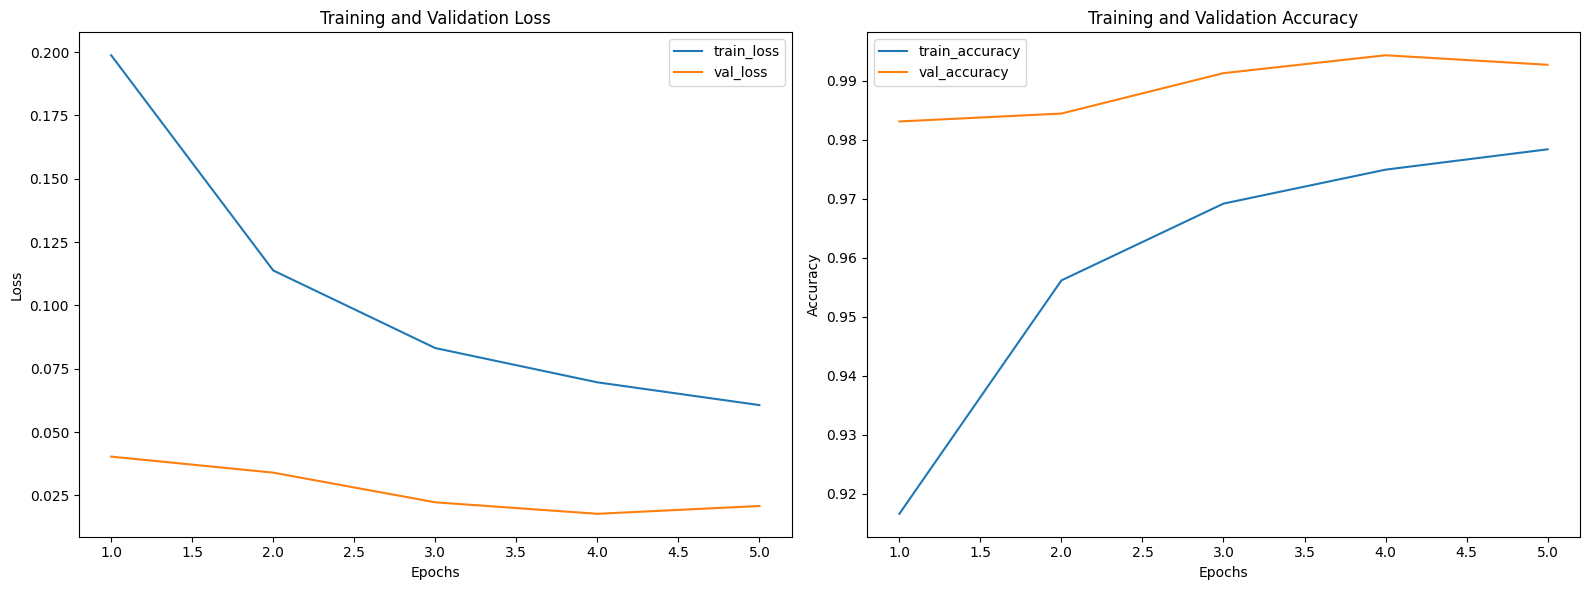

In [49]:
plot_graphs(a_train_accuracy,a_val_accuracy,a_train_loss,a_val_loss)

* By using the Adagrad and Adam optimizers, we can clearly see that the model is overfitting for the epoch number 5.
* We have to use various regularization techniques to reduce the overfitting.

## **Early Stopping**

In [50]:
from tensorflow.keras.callbacks import EarlyStopping

In [51]:
ann_early_stopping_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_size),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # as we have 3 classes.So, we are using softmax activation
])

early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=2,
                               min_delta=0.002,  # setting threshold value to val_accuracy. i.e., if the val_accuracy is 0.9823 in 1st run and 0.9825 in next run the early stopping will get implemented,
                               restore_best_weights=True)
# Compile the model with sparse_categorical_crossentropy as we have the output labels are 0,1,2
ann_early_stopping_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ann_early_stopping_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               3840      
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dense_17 (Dense)            (None, 3)                 51        
                                                                 
Total params: 47,651
Trainable params: 47,651
Non-trai

In [52]:
# fitting the model
ann_early_stopping_history = ann_early_stopping_model.fit(X_train_smote, y_train_smote, batch_size=batch_size, epochs=20, validation_data=(X_test, y_test),callbacks=[early_stopping])

Epoch 1/20
1102/1102 [==============================] - 11s 9ms/step - loss: 0.2080 - accuracy: 0.9107 - val_loss: 0.0372 - val_accuracy: 0.9858
Epoch 2/20
1102/1102 [==============================] - 10s 9ms/step - loss: 0.1087 - accuracy: 0.9581 - val_loss: 0.0337 - val_accuracy: 0.9852
Epoch 3/20
1102/1102 [==============================] - 10s 9ms/step - loss: 0.0879 - accuracy: 0.9686 - val_loss: 0.0304 - val_accuracy: 0.9890
Epoch 4/20
1102/1102 [==============================] - 10s 9ms/step - loss: 0.0711 - accuracy: 0.9752 - val_loss: 0.0229 - val_accuracy: 0.9922
Epoch 5/20
1102/1102 [==============================] - 10s 9ms/step - loss: 0.0618 - accuracy: 0.9784 - val_loss: 0.0195 - val_accuracy: 0.9941
Epoch 6/20
1102/1102 [==============================] - 10s 9ms/step - loss: 0.0563 - accuracy: 0.9805 - val_loss: 0.0211 - val_accuracy: 0.9934


* Here the modelling part stopped at 6th epoch even though we have given 20 epochs which is due to Early Stopping.

In [53]:
es_train_accuracy,es_val_accuracy,es_train_loss,es_val_loss = accuracy_loss(ann_early_stopping_history)

Train Accuracy :  0.9805043339729309
Validation Accuracy :  0.9933956861495972
Train Loss :  0.056268926709890366
Validation Loss :  0.02110578678548336


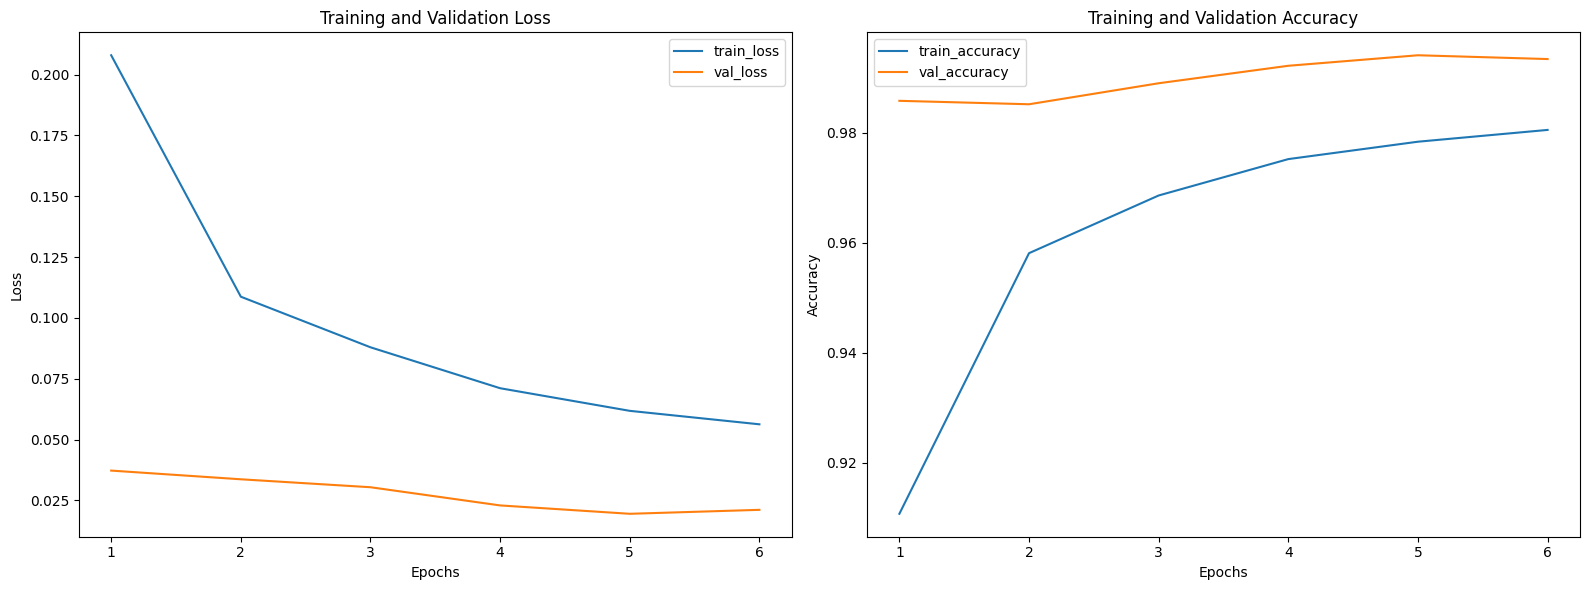

In [57]:
plot_graphs(es_train_accuracy,es_val_accuracy,es_train_loss,es_val_loss,6)

* Using the early stopping , we are getting the Train Accuracy as 98.05% and Validation Accuracy as 99.33 %, which is fine and our model is performing well.

## **Drop Out Layers**
* Let's for starters use 50% drop out percentage and if it under performs we can can the drop out precentage.

In [58]:
from tensorflow.keras.layers import Dropout

In [59]:
ann_drop_out_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_size),
    Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'),
    Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')  # as we have 3 classes.So, we are using softmax activation
])

# Compile the model with sparse_categorical_crossentropy as we have the output labels are 0,1,2
ann_drop_out_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ann_drop_out_model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_18 (Dense)            (None, 256)               3840      
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)               

In [60]:
# fitting the drop out model
ann_drop_out_model_history = ann_drop_out_model.fit(X_train_smote, y_train_smote, batch_size=batch_size, epochs=12, validation_data=(X_test, y_test))

Epoch 1/12
1102/1102 [==============================] - 24s 20ms/step - loss: 0.7122 - accuracy: 0.5936 - val_loss: 0.3221 - val_accuracy: 0.8498
Epoch 2/12
1102/1102 [==============================] - 22s 20ms/step - loss: 0.5985 - accuracy: 0.6413 - val_loss: 0.3740 - val_accuracy: 0.8959
Epoch 3/12
1102/1102 [==============================] - 24s 22ms/step - loss: 0.5828 - accuracy: 0.6590 - val_loss: 0.4363 - val_accuracy: 0.9155
Epoch 4/12
1102/1102 [==============================] - 24s 22ms/step - loss: 0.5750 - accuracy: 0.6685 - val_loss: 0.4744 - val_accuracy: 0.8946
Epoch 5/12
1102/1102 [==============================] - 25s 23ms/step - loss: 0.5697 - accuracy: 0.6749 - val_loss: 0.4983 - val_accuracy: 0.8932
Epoch 6/12
1102/1102 [==============================] - 23s 21ms/step - loss: 0.5660 - accuracy: 0.6784 - val_loss: 0.7023 - val_accuracy: 0.7276
Epoch 7/12
1102/1102 [==============================] - 23s 21ms/step - loss: 0.5634 - accuracy: 0.6828 - val_loss: 0.6549 -

In [61]:
dropout_train_accuracy,dropout_val_accuracy,dropout_train_loss,dropout_val_loss = accuracy_loss(ann_drop_out_model_history)

Train Accuracy :  0.7044733762741089
Validation Accuracy :  0.7113986015319824
Train Loss :  0.5510947704315186
Validation Loss :  0.691803514957428


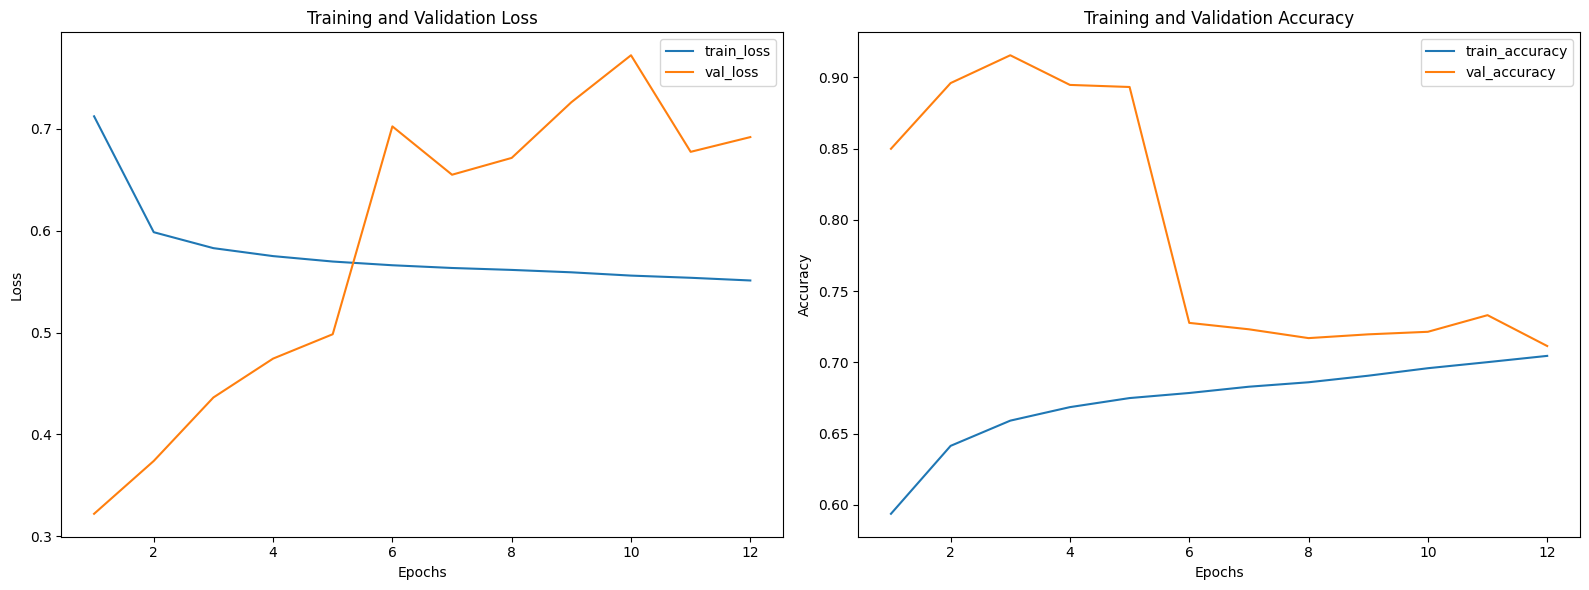

In [62]:
plot_graphs(dropout_train_accuracy,dropout_val_accuracy,dropout_train_loss,dropout_val_loss,12)

* As we can the training loss is almost the constant and there are fluctuations in validation loss.
* While in accuracy the training accuracy is at 74% and validation accuracy is in zig zag manner ranging between 88% and 74% till epoch 10.
* But from epoch 11 to 12 the training accuracy is 70.4% and Validation Accuracy  is  71.1% which means model is converging and perfroming very well.

In [63]:
ann_drop_out_dynamic_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_size),
    Dropout(0.6),
    tf.keras.layers.Dense(256, activation='relu'),
    Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    Dropout(0.45),
    tf.keras.layers.Dense(64, activation='relu'),
    Dropout(0.40),
    tf.keras.layers.Dense(32, activation='relu'),
    Dropout(0.35),
    tf.keras.layers.Dense(16, activation='relu'),
    Dropout(0.30),
    tf.keras.layers.Dense(3, activation='softmax')  # as we have 3 classes.So, we are using softmax activation
])

# Compile the model with sparse_categorical_crossentropy as we have the output labels are 0,1,2
ann_drop_out_dynamic_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ann_drop_out_dynamic_model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_6 (Dropout)         (None, 14)                0         
                                                                 
 dense_24 (Dense)            (None, 256)               3840      
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_25 (Dense)            (None, 128)               32896     
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_26 (Dense)            (None, 64)                8256      
                                                                 
 dropout_9 (Dropout)         (None, 64)               

In [64]:
# fitting the drop out dynamic values in drop out layer model
ann_drop_out_dynamic_model_history = ann_drop_out_dynamic_model.fit(X_train_smote, y_train_smote, batch_size=batch_size, epochs=12, validation_data=(X_test, y_test))

Epoch 1/12
1102/1102 [==============================] - 24s 20ms/step - loss: 0.7413 - accuracy: 0.5814 - val_loss: 0.4280 - val_accuracy: 0.8130
Epoch 2/12
1102/1102 [==============================] - 23s 21ms/step - loss: 0.6393 - accuracy: 0.6244 - val_loss: 0.7618 - val_accuracy: 0.6976
Epoch 3/12
1102/1102 [==============================] - 25s 22ms/step - loss: 0.6213 - accuracy: 0.6372 - val_loss: 0.8475 - val_accuracy: 0.7020
Epoch 4/12
1102/1102 [==============================] - 25s 23ms/step - loss: 0.6114 - accuracy: 0.6454 - val_loss: 0.9382 - val_accuracy: 0.6964
Epoch 5/12
1102/1102 [==============================] - 31s 28ms/step - loss: 0.6056 - accuracy: 0.6515 - val_loss: 1.0810 - val_accuracy: 0.6977
Epoch 6/12
1102/1102 [==============================] - 27s 24ms/step - loss: 0.6002 - accuracy: 0.6574 - val_loss: 1.0562 - val_accuracy: 0.7004
Epoch 7/12
1102/1102 [==============================] - 23s 21ms/step - loss: 0.5971 - accuracy: 0.6630 - val_loss: 1.0898 -

In [65]:
ddo_train_accuracy,ddo_val_accuracy,ddo_train_loss,ddo_val_loss = accuracy_loss(ann_drop_out_dynamic_model_history)

Train Accuracy :  0.688247799873352
Validation Accuracy :  0.6883276700973511
Train Loss :  0.5790712833404541
Validation Loss :  1.2186223268508911


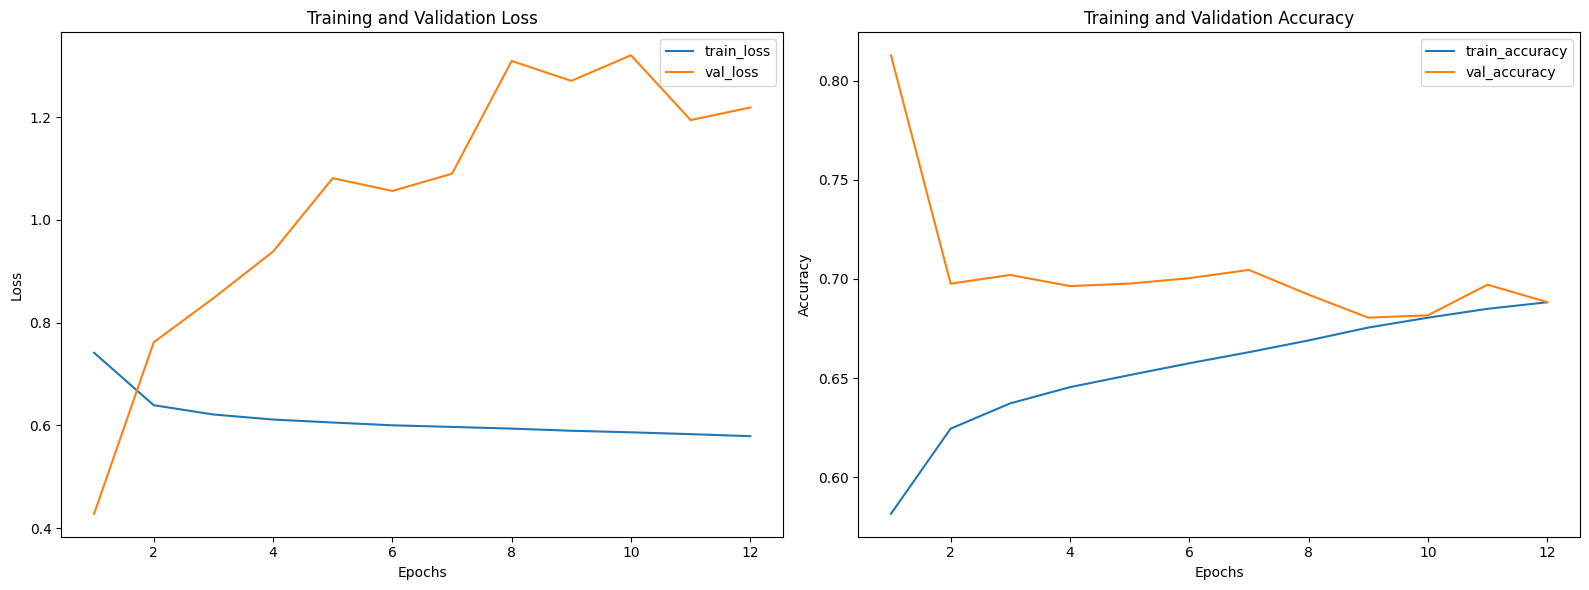

In [66]:
plot_graphs(ddo_train_accuracy,ddo_val_accuracy,ddo_train_loss,ddo_val_loss,12)

* From the above plot, we can see that training accuracy and validation accuracy are converging to the same value which is 68.8 %.

In [67]:
ann_ddo_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_size),
    Dropout(0.6),
    tf.keras.layers.Dense(256, activation='relu'),
    Dropout(0.55),
    tf.keras.layers.Dense(128, activation='relu'),
    Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    Dropout(0.1),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model with sparse_categorical_crossentropy as we have the output labels are 0,1,2
ann_ddo_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ann_ddo_model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_12 (Dropout)        (None, 14)                0         
                                                                 
 dense_30 (Dense)            (None, 256)               3840      
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 dense_31 (Dense)            (None, 128)               32896     
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_32 (Dense)            (None, 64)                8256      
                                                                 
 dropout_15 (Dropout)        (None, 64)               

In [69]:
# fitting the drop out dynamic values in drop out layer model
ann_dd_model_history = ann_ddo_model.fit(X_train_smote, y_train_smote, batch_size=batch_size, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1102/1102 [==============================] - 26s 23ms/step - loss: 0.5335 - accuracy: 0.7194 - val_loss: 2.2238 - val_accuracy: 0.4797
Epoch 2/10
1102/1102 [==============================] - 22s 20ms/step - loss: 0.5273 - accuracy: 0.7229 - val_loss: 2.3821 - val_accuracy: 0.4909
Epoch 3/10
1102/1102 [==============================] - 22s 20ms/step - loss: 0.5222 - accuracy: 0.7258 - val_loss: 2.7890 - val_accuracy: 0.4732
Epoch 4/10
1102/1102 [==============================] - 22s 20ms/step - loss: 0.5182 - accuracy: 0.7277 - val_loss: 2.9001 - val_accuracy: 0.4446
Epoch 5/10
1102/1102 [==============================] - 23s 21ms/step - loss: 0.5149 - accuracy: 0.7296 - val_loss: 2.3463 - val_accuracy: 0.4682
Epoch 6/10
1102/1102 [==============================] - 22s 20ms/step - loss: 0.5117 - accuracy: 0.7320 - val_loss: 2.7392 - val_accuracy: 0.4791
Epoch 7/10
1102/1102 [==============================] - 23s 21ms/step - loss: 0.5098 - accuracy: 0.7332 - val_loss: 2.6717 -

In [70]:
dd_train_accuracy,dd_val_accuracy,dd_train_loss,dd_val_loss = accuracy_loss(ann_dd_model_history)

Train Accuracy :  0.7363455295562744
Validation Accuracy :  0.458946168422699
Train Loss :  0.5041100382804871
Validation Loss :  2.8315014839172363


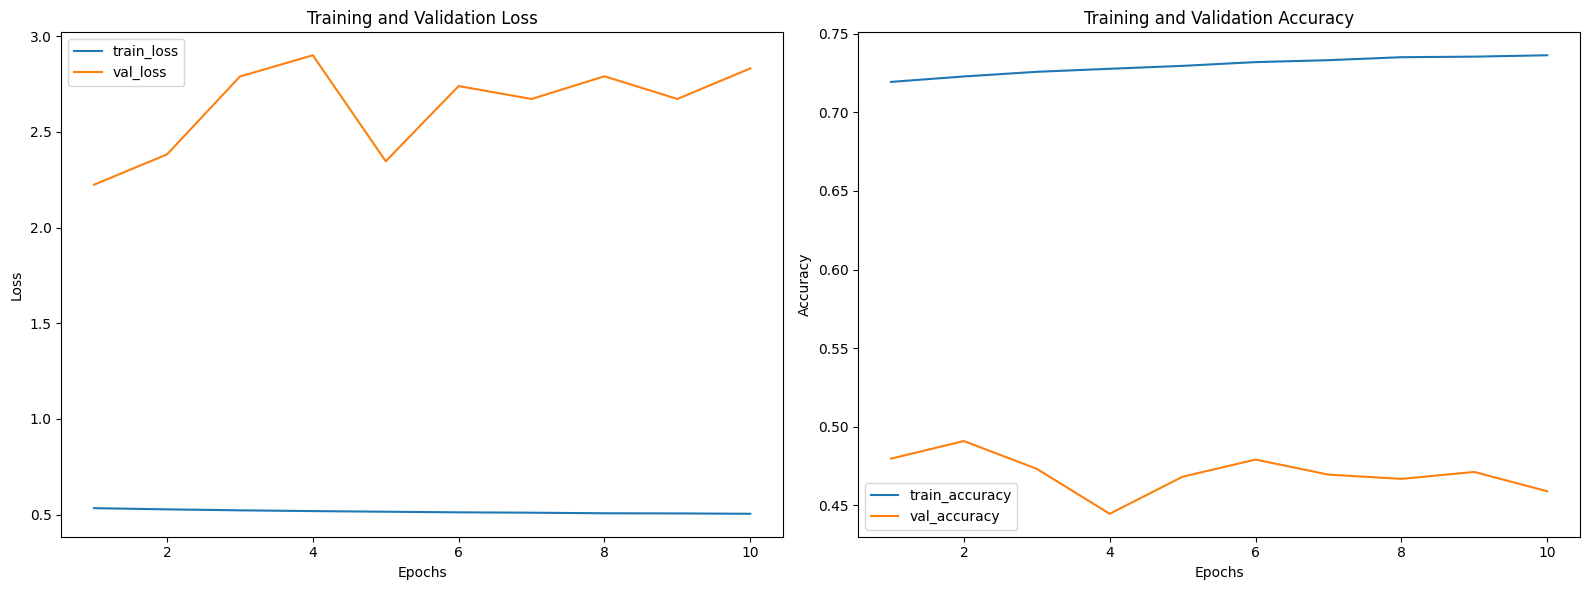

In [71]:
plot_graphs(dd_train_accuracy,dd_val_accuracy,dd_train_loss,dd_val_loss,10)

* Here the model is under performing.

## **L1 and L2 regularization**

In [28]:
from tensorflow.keras.regularizers import l1, l2,l1_l2

In [29]:
# Define your model with L1 and L2 regularization
ann_l1l2_model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(input_size,), kernel_regularizer=l1(0.001)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=l1(0.001)),
    tf.keras.layers.Dense(3, activation='softmax')
])
ann_l1l2_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               4096      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 3)                 51        
                                                                 
Total params: 47,907
Trainable params: 47,907
Non-traina

In [30]:
# Compile the model
ann_l1l2_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
ann_l1l2_model_history = ann_l1l2_model.fit(X_train_smote, y_train_smote,batch_size=batch_size, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
1102/1102 [==============================] - 13s 11ms/step - loss: 0.5612 - accuracy: 0.8802 - val_loss: 0.2469 - val_accuracy: 0.9619
Epoch 2/15
1102/1102 [==============================] - 12s 11ms/step - loss: 0.3409 - accuracy: 0.9101 - val_loss: 0.1929 - val_accuracy: 0.9703
Epoch 3/15
1102/1102 [==============================] - 13s 12ms/step - loss: 0.3002 - accuracy: 0.9231 - val_loss: 0.1659 - val_accuracy: 0.9764
Epoch 4/15
1102/1102 [==============================] - 12s 11ms/step - loss: 0.2718 - accuracy: 0.9348 - val_loss: 0.1630 - val_accuracy: 0.9758
Epoch 5/15
1102/1102 [==============================] - 12s 11ms/step - loss: 0.2512 - accuracy: 0.9423 - val_loss: 0.1578 - val_accuracy: 0.9765
Epoch 6/15
1102/1102 [==============================] - 13s 12ms/step - loss: 0.2366 - accuracy: 0.9481 - val_loss: 0.1426 - val_accuracy: 0.9818
Epoch 7/15
1102/1102 [==============================] - 11s 10ms/step - loss: 0.2248 - accuracy: 0.9533 - val_loss: 0.1397 -

In [35]:
l1l2_train_accuracy,l1l2_val_accuracy,l1l2_train_loss,l1l2_val_loss = accuracy_loss(ann_l1l2_model_history)

Train Accuracy :  0.9687483310699463
Validation Accuracy :  0.9896135926246643
Train Loss :  0.17613795399665833
Validation Loss :  0.11285026371479034


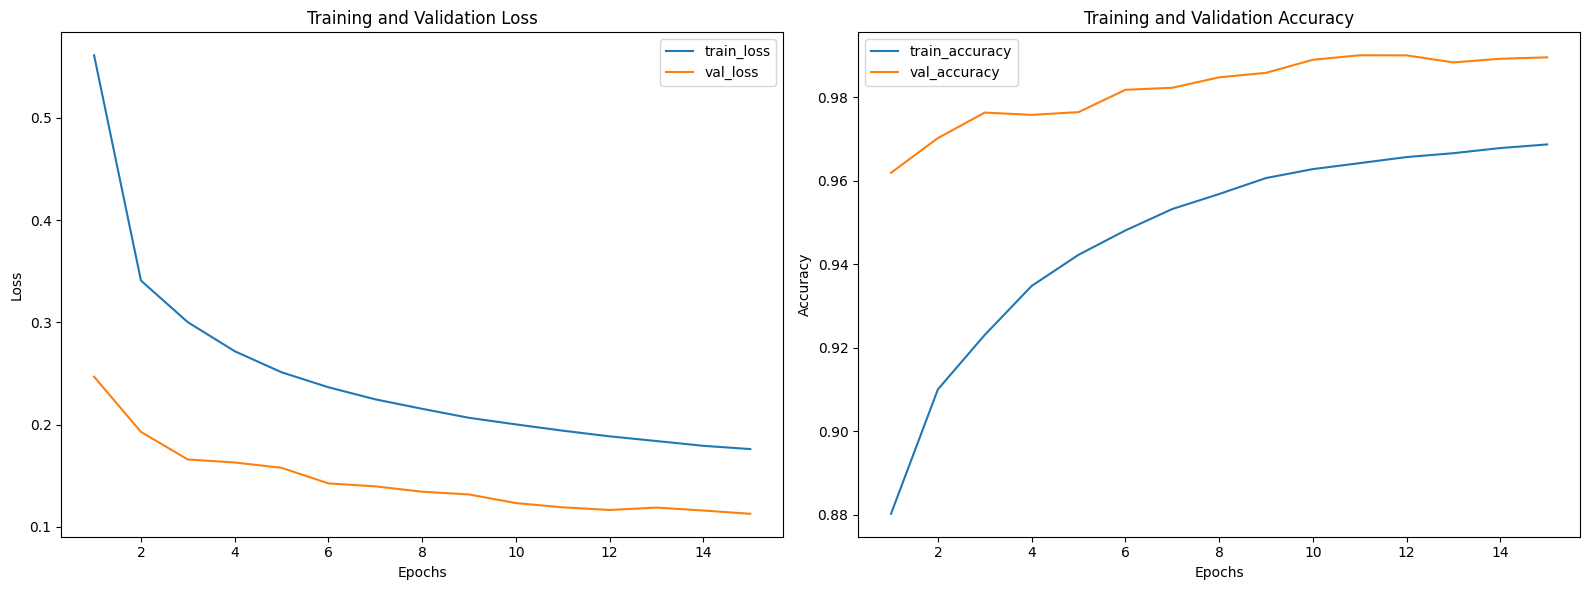

In [36]:
plot_graphs(l1l2_train_accuracy,l1l2_val_accuracy,l1l2_train_loss,l1l2_val_loss,15)

* After apply the L1 and L2 regularoization to all the hidden layers the model overfitting has reduced.
* The training accuracy 96.8% and validation accuracy is 98.96 % which are close to each other and from the Accuracy graph the models are converging correctly.

## **Model Building - Random Forest**

In [10]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0)

# fit the model
rfc.fit(X_resampled, y_resampled)

# Predict the Test set results
y_pred = rfc.predict(X_test)

# Check accuracy score 
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9993


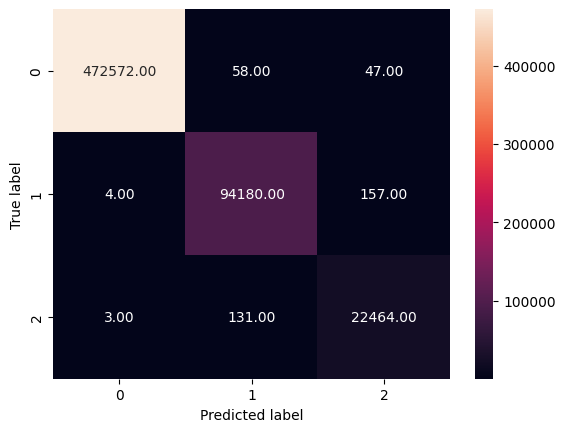

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
# visualize confusion matrix with seaborn heatmap
sns.heatmap(cm, annot=True,  fmt='.2f')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    472677
           1       1.00      1.00      1.00     94341
           2       0.99      0.99      0.99     22598

    accuracy                           1.00    589616
   macro avg       1.00      1.00      1.00    589616
weighted avg       1.00      1.00      1.00    589616



In [14]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(rfc.score(X_resampled, y_resampled)))
print('Test set score: {:.4f}'.format(rfc.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9993


In [15]:
# instantiate the classifier with n_estimators = 50

rfc_50 = RandomForestClassifier(n_estimators=50, random_state=0)

# fit the model to the training set

rfc_50.fit(X_resampled, y_resampled)

# Predict on the test set results

y_pred_50 = rfc_50.predict(X_test)

# Check accuracy score 
print('Model accuracy score with 50 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_50)))

Model accuracy score with 50 decision-trees : 0.9992


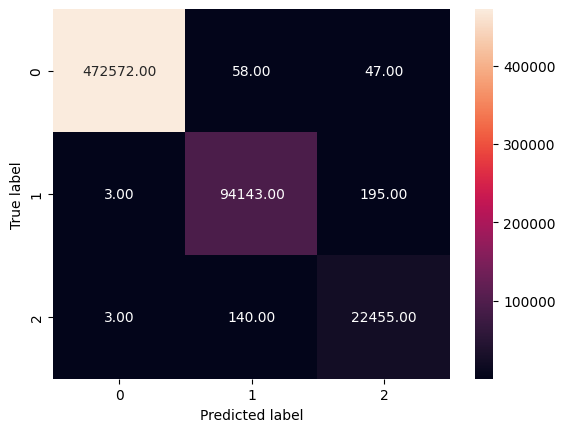

In [16]:
cm_50 = confusion_matrix(y_test, y_pred_50)
# visualize confusion matrix with seaborn heatmap
sns.heatmap(cm_50, annot=True,  fmt='.2f')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_50))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    472677
           1       1.00      1.00      1.00     94341
           2       0.99      0.99      0.99     22598

    accuracy                           1.00    589616
   macro avg       1.00      1.00      1.00    589616
weighted avg       1.00      1.00      1.00    589616



In [18]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(rfc_50.score(X_resampled, y_resampled)))
print('Test set score: {:.4f}'.format(rfc_50.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9992


In [11]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy']
}
gscv = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
gscv.fit(X_resampled, y_resampled)

rfc_gscv = gscv.best_estimator_

y_pred = rfc_gscv.predict(X_test)

print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    472677
           1       1.00      1.00      1.00     94341
           2       0.99      0.99      0.99     22598

    accuracy                           1.00    589616
   macro avg       1.00      1.00      1.00    589616
weighted avg       1.00      1.00      1.00    589616



## **Feature Importance**

In [98]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set

clf.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=0)

In [99]:
# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

src_ip           0.328902
dest_port        0.120906
time_end         0.107112
total_entropy    0.092984
duration         0.057770
bytes_out        0.056455
src_port         0.055211
dest_ip          0.055162
num_pkts_in      0.035317
entropy          0.032744
bytes_in         0.026544
num_pkts_out     0.014853
proto            0.010043
avg_ipt          0.005995
dtype: float64

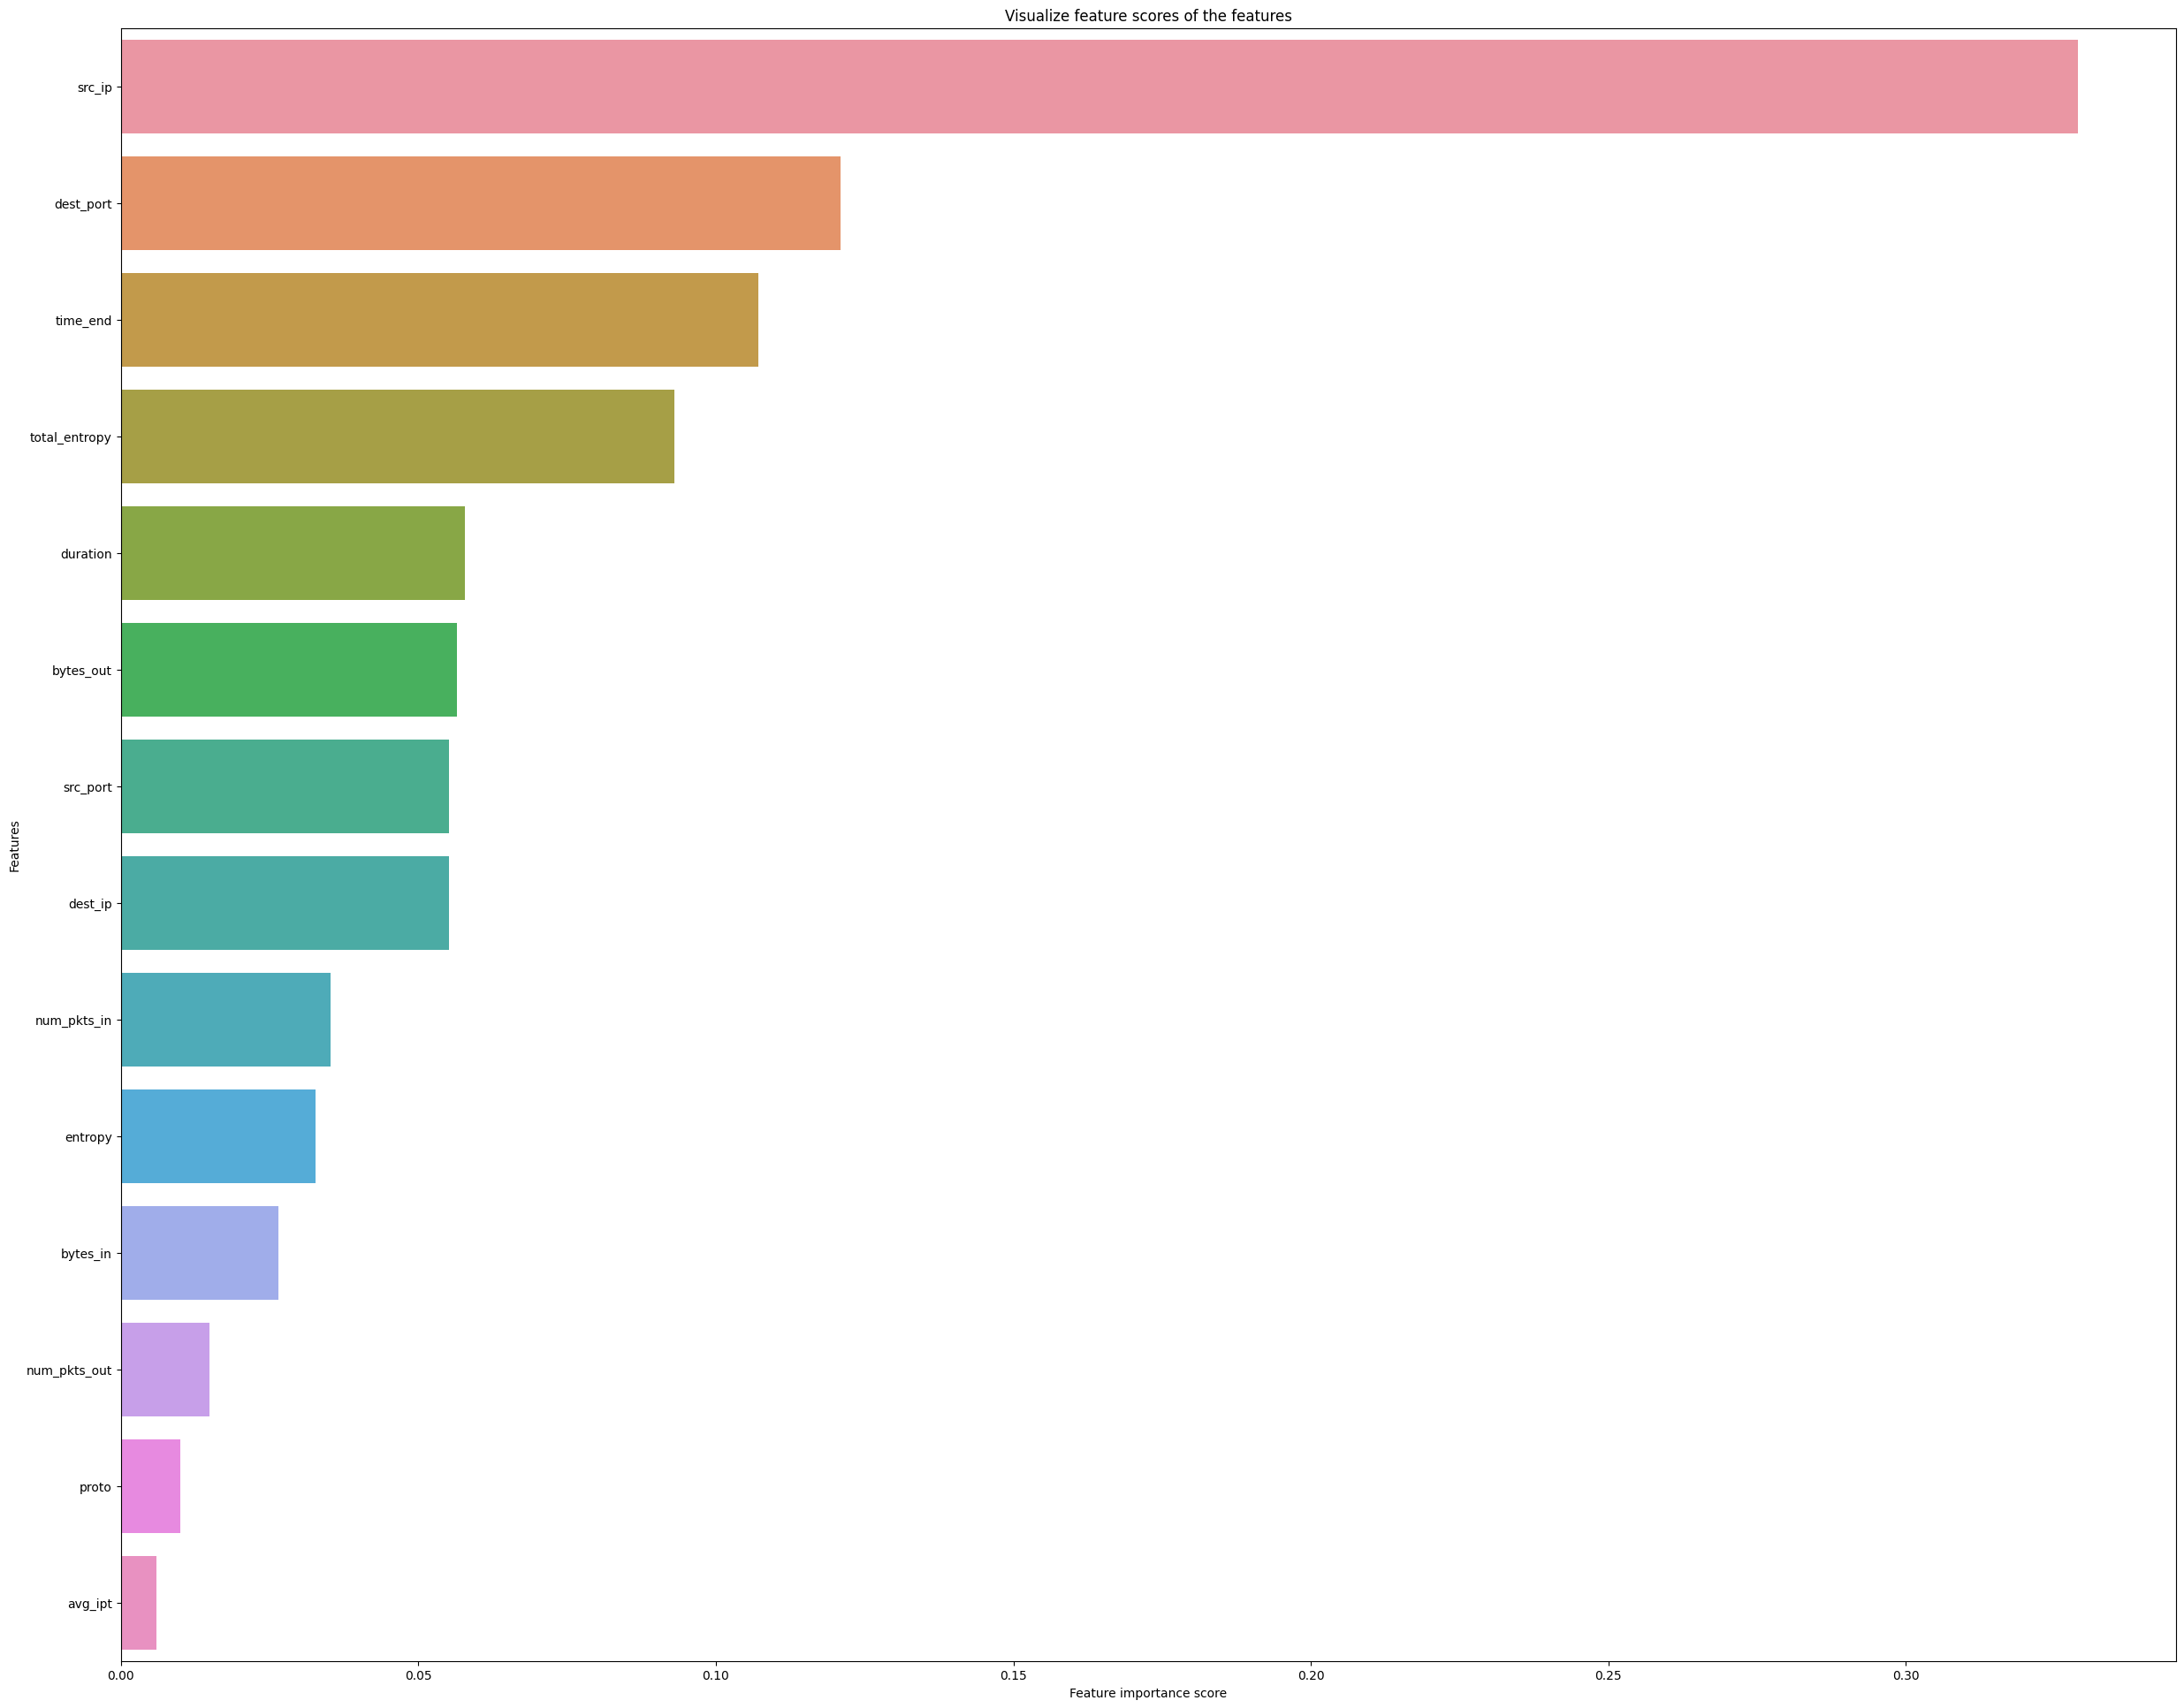

In [101]:
df_feature_scores = feature_scores.reset_index()
df_feature_scores.columns = ['Features', 'Feature Importance Score']

# Creating a seaborn bar plot
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x='Feature Importance Score', y='Features', data=df_feature_scores)
ax.set_title("Visualize feature scores of the features")
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

* From the above plot, we can see that the feature src_ip is important and least significant feature is avg_ipt. So, we are testing the model by removing it.

In [37]:
# drop the least important feature from X_train and X_test

X_train_fi = X_train.drop(['avg_ipt'], axis=1)
X_test_fi = X_test.drop(['avg_ipt'], axis=1)

In [38]:
# instantiate the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
clf.fit(X_train_fi, y_train)
# Predict on the test set results
y_pred_fi = clf.predict(X_test_fi)

# Check accuracy score 
print('Model accuracy score with avg_ipt variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred_fi)))

Model accuracy score with avg_ipt variable removed : 0.9996


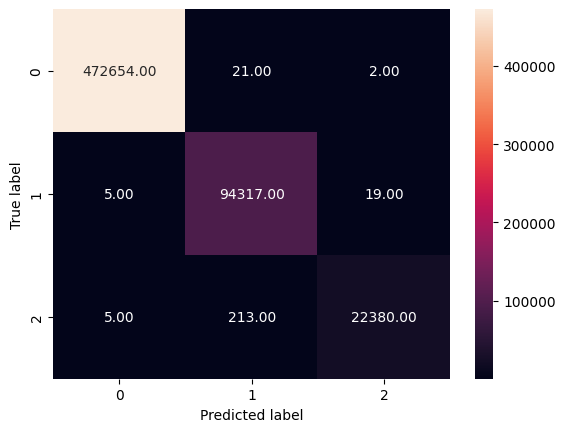

In [39]:
cm_fi = confusion_matrix(y_test, y_pred_fi)
# visualize confusion matrix with seaborn heatmap
sns.heatmap(cm_fi, annot=True,  fmt='.2f')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [40]:
print(classification_report(y_test, y_pred_fi))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    472677
           1       1.00      1.00      1.00     94341
           2       1.00      0.99      0.99     22598

    accuracy                           1.00    589616
   macro avg       1.00      1.00      1.00    589616
weighted avg       1.00      1.00      1.00    589616



In [41]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf.score(X_train_fi, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test_fi, y_test)))

Training set score: 1.0000
Test set score: 0.9996


## **Model Evaluation**

### **ML model - Random Forest**

In [19]:
rfc_50_train_acc = rfc_50.score(X_resampled, y_resampled)
rfc_50_test_acc = rfc_50.score(X_test, y_test)

In [20]:
Harmonic_mean_accuracy = (2 * (rfc_50_train_acc * rfc_50_test_acc)) / (rfc_50_train_acc + rfc_50_test_acc)
diff_rfc_50_test_train_difference = abs(rfc_50_test_acc - rfc_50_train_acc)

In [21]:
Harmonic_mean_accuracy

0.9996216446411818

In [22]:
diff_rfc_50_test_train_difference

0.0007564245203658393

### **Harmonic mean of ANN(L1L2 regularized) model**

In [42]:
import numpy as np
y_train_pred = np.argmax(ann_l1l2_model.predict(X_train), axis=1)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy: {}".format(train_accuracy))


y_test_pred = np.argmax(ann_l1l2_model.predict(X_test), axis=1)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy: {}".format(test_accuracy))

42993/42993 [==============================] - 61s 1ms/step
Train Accuracy: 0.9895425834260088
18426/18426 [==============================] - 25s 1ms/step
Test Accuracy: 0.9896135790073539


In [43]:
Harmonic_mean_accuracy = (2 * (train_accuracy * test_accuracy)) / (train_accuracy + test_accuracy)
test_train_difference = abs(test_accuracy - train_accuracy)

In [44]:
Harmonic_mean_accuracy

0.9895780799433174

In [45]:
test_train_difference

7.099558134515682e-05

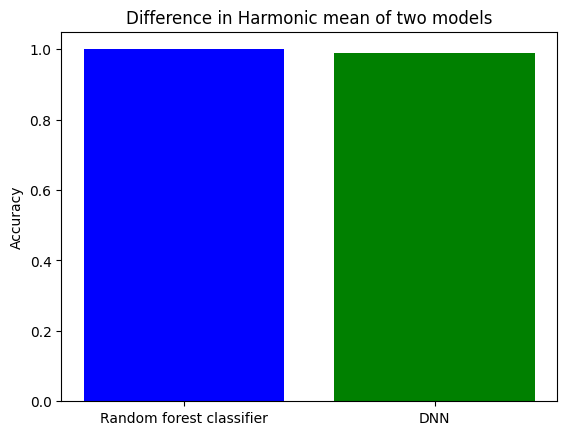

In [48]:
models = ['Random forest classifier', 'DNN']
accuracies = [0.9996216446411818, 0.9895780799433174]
plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Difference in Harmonic mean of two models')
plt.show()

## **Results and Conclusion**

* From the above plot, we can see that the harmonic mean accuracy between the two models Random Forest classifier and Artificial Neural Network is identical, but Random Forest classifier worked with under sampled data which has around 50K records and Neural Network has given the over sampled data with SMOTE sampling menthod which is around 3.3 million recrods.
* Even though Random Forest classifier is giving good results but with the increase of data ML models take long time to process and fail to produce good results.